# Predicting Doctor's Consultation Fee - MachineHACK Hackathon

## 1. Importing Required Packages & Reading Data

In [398]:
import os
os.getcwd()

'C:\\OneDrive - Tredence\\Training\\Hackathons\\MachineHack_DoctorFee'

In [399]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

In [400]:
train_data = pd.read_excel('Final Participant Data Folder/Final_Train.xlsx')
test_data = pd.read_excel('Final Participant Data Folder/Final_Test.xlsx')

## 2. Exploratory Data Analysis 
### Univariate, Missing value treatment, Feature Engeneering & Relationships

### 2.0 Combine train and test datasets for EDA

In [401]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB
None


In [402]:
# Creating a combined data frame
test_data['Fees'] = nan
#test_data.head()
df = train_data.append(test_data)
df['train_flag'] = np.where(df.Fees.isnull(),0,1)
df.head()

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place         Profile  \
0  Kakkanad, Ernakulam           Homeopath        
1  Whitefield, Bangalore         Ayurveda         
2  Mathikere - BEL, Bangalore    ENT Specialist   
3  Bannerghatta Road, Bangalore  Ayurveda         
4  Keelkattalai, Chennai         Ayurveda         

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  
0  1           
1  1           
2  1           
3  1           
4  1

In [403]:
df.train_flag.value_counts()

1    5961
0    1987
Name: train_flag, dtype: int64

In [404]:
df.head()

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place         Profile  \
0  Kakkanad, Ernakulam           Homeopath        
1  Whitefield, Bangalore         Ayurveda         
2  Mathikere - BEL, Bangalore    ENT Specialist   
3  Bannerghatta Road, Bangalore  Ayurveda         
4  Keelkattalai, Chennai         Ayurveda         

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  
0  1           
1  1           
2  1           
3  1           
4  1

In [405]:
print(df.shape)
print(df.columns)
print(df.info())

(7948, 8)
Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'train_flag'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
Qualification         7948 non-null object
Experience            7948 non-null object
Rating                3556 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Miscellaneous_Info    4494 non-null object
Fees                  5961 non-null float64
train_flag            7948 non-null int32
dtypes: float64(1), int32(1), object(6)
memory usage: 527.8+ KB
None


In [406]:
df.describe()

Fees  train_flag
count  5961.000000  7948.00000
mean   307.944640   0.75000   
std    190.920373   0.43304   
min    5.000000     0.00000   
25%    150.000000   0.75000   
50%    300.000000   1.00000   
75%    500.000000   1.00000   
max    950.000000   1.00000

In [407]:
df.describe(include=['object', 'bool'])

Qualification          Experience Rating                  Place  \
count   7948          7948                3556   7917                    
unique  1801          64                  52     948                     
top     BDS           9 years experience  100%   HSR Layout, Bangalore   
freq    632           419                 907    97                      

        Profile  \
count   7948      
unique  6         
top     Dentist   
freq    1838      

                                                        Miscellaneous_Info  
count   4494                                                                
unique  3980                                                                
top     Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth  
freq    50

Looks like all the categorical variables have lot of levels associated with them (except for 'Profile'). We may have to group them and engineer new features based on certain keywords and rules.

### 2.2 Understanding Missing values

In [408]:
df.loc[:,df.columns != 'Fees'].isnull().mean(axis=0)

Qualification         0.000000
Experience            0.000000
Rating                0.552592
Place                 0.003900
Profile               0.000000
Miscellaneous_Info    0.434575
train_flag            0.000000
dtype: float64

We will get to missing value treatment in sometime. But let us first see if there is any correlation in missing values between 'Rating' and 'Miscellaneous_Info'

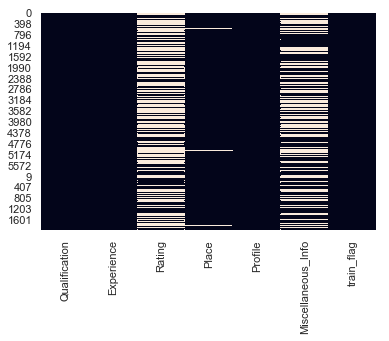

In [409]:
# Identifying the pattern of missing values across columns
sns.heatmap(df.loc[:,df.columns != 'Fees'].isnull(), cbar=False)

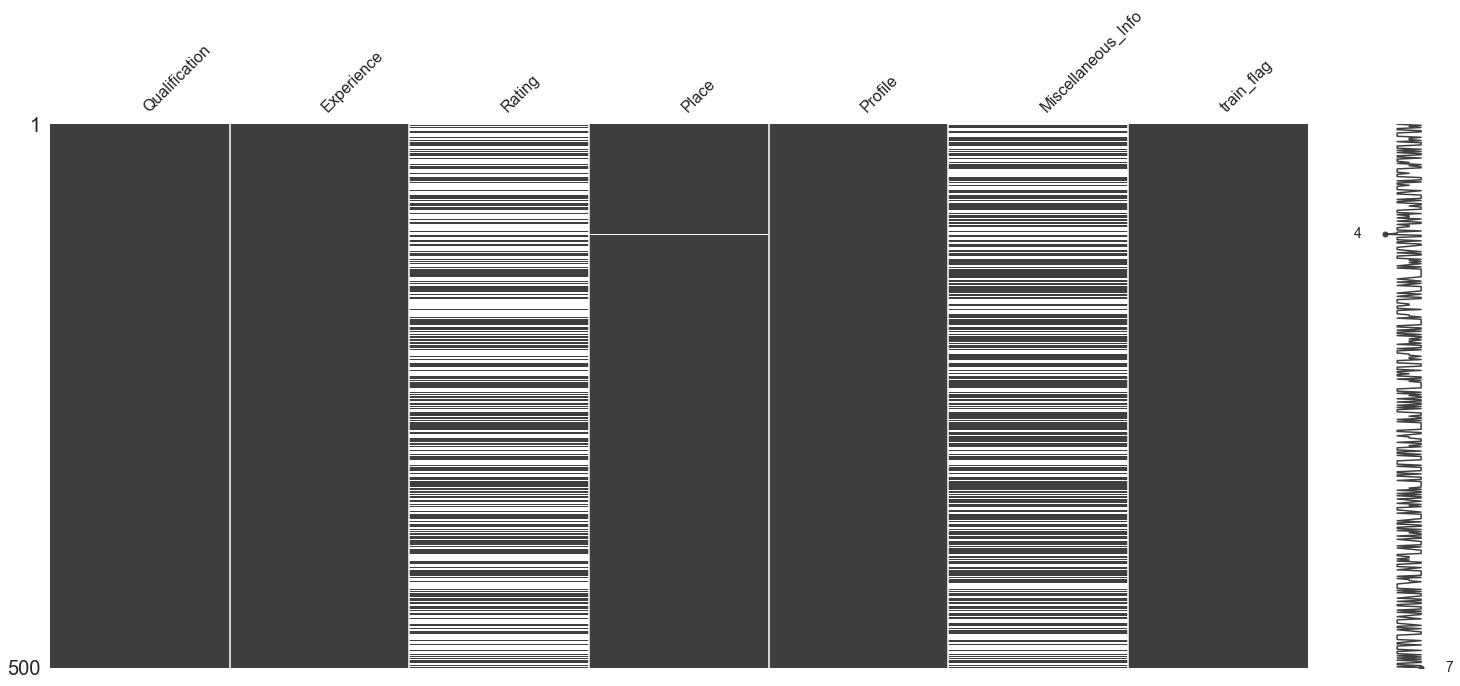

In [410]:
msno.matrix(df.loc[:,df.columns != 'Fees'].sample(500))

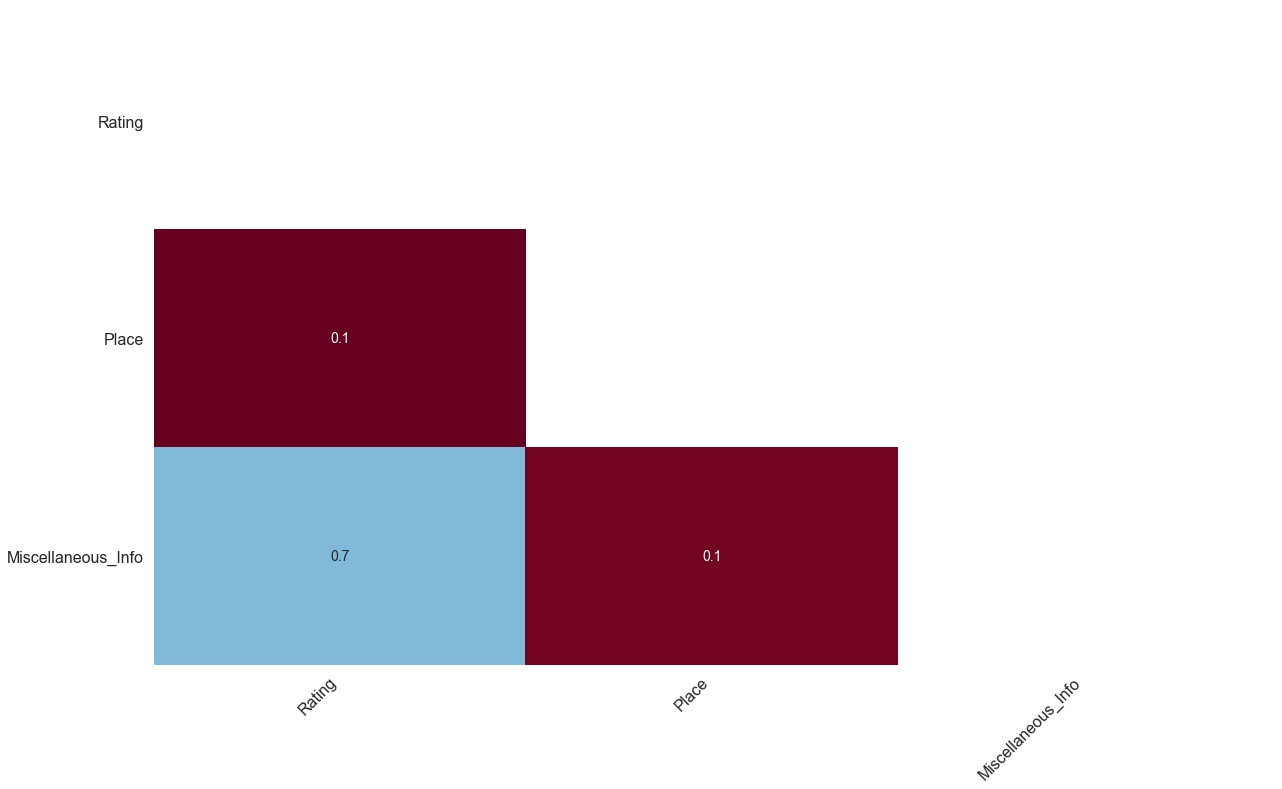

In [411]:
msno.heatmap(df.loc[:,df.columns != 'Fees'])

Rating and misc_info has great deal of nullity correlation

In [412]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
df[['Rating','Miscellaneous_Info']].head(100)

Rating  \
0   100%    
1   98%     
2   NaN     
3   NaN     
4   100%    
5   NaN     
6   NaN     
7   99%     
8   NaN     
9   NaN     
10  NaN     
11  NaN     
12  98%     
13  NaN     
14  NaN     
15  NaN     
16  NaN     
17  NaN     
18  79%     
19  100%    
20  100%    
21  NaN     
22  NaN     
23  NaN     
24  NaN     
25  NaN     
26  100%    
27  95%     
28  NaN     
29  97%     
30  97%     
31  NaN     
32  94%     
33  88%     
34  NaN     
35  100%    
36  NaN     
37  90%     
38  80%     
39  NaN     
40  100%    
41  100%    
42  100%    
43  NaN     
44  99%     
45  NaN     
46  100%    
47  NaN     
48  93%     
49  NaN     
50  NaN     
51  NaN     
52  NaN     
53  100%    
54  100%    
55  36%     
56  100%    
57  97%     
58  NaN     
59  99%     
60  NaN     
61  99%     
62  98%     
63  NaN     
64  NaN     
65  100%    
66  100%    
67  78%     
68  NaN     
69  99%     
70  93%     
71  NaN     
72  NaN     
73  NaN     
74  87%     
75  93%     
76  NaN     
77  98%     
78  97%     
79  NaN     
80  NaN     
81  NaN     
82  NaN     
83  99%     
84  100%    
85  NaN     
86  99%     
87  NaN     
88  94%     
89  NaN     
90  NaN     
91  NaN     
92  NaN     
93  100%    
94  100%    
95  100%    
96  97%     
97  NaN     
98  NaN     
99  98%     

                                                                            Miscellaneous_Info  
0   100% 16 Feedback Kakkanad, Ernakulam                                                        
1   98% 76 Feedback Whitefield, Bangalore                                                       
2   NaN                                                                                         
3   Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb                                  
4   100% 4 Feedback Keelkattalai, Chennai                                                       
5   NaN                                                                                         
6   NaN                                                                                         
7   Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction             
8   NaN                                                                                         
9   NaN                                                                                         
10  NaN                                                                                         
11  NaN                                                                                         
12  98% 14 Feedback Coimbatore Racecourse, Coimbatore                                           
13  Dental Crowns Facet Dental Dental prophylaxis                                               
14  NaN                                                                                         
15  NaN                                                                                         
16  NaN                                                                                         
17  NaN                                                                                         
18  79% 8 Feedback KPHB, Hyderabad                                                              
19  100% 4 Feedback HSR Layout, Bangalore                                                       
20  100% 7 Feedback Pollachi, Coimbatore                                                        
21  Adenoid / Tonsil Surgery Rhinoplasty Laryngoscopy                                           
22  NaN                                                                                         
23  NaN                                                                                         
24  NaN                                                                                         
25  NaN                                                                                         
26  100% 46 Feedback HSR Layout, Bangalore                            

1. Woahh!! Looks like rating is a derived column of Misc_info. 
2. Rating is more missing than Misc_info because some of Misc_info doesn't contain rating of the doctor
3. Also, it looks like Misc_info is a combination of Rating, # Reviewers and Comments

### 2.3 Let us go one by one variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A38BBE80>]],
      dtype=object)

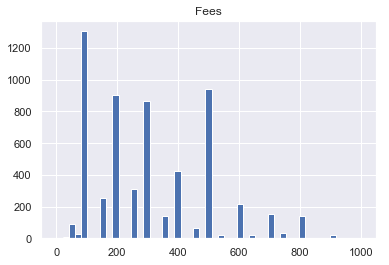

In [413]:
# Start with the response variable
df[df['train_flag']==1].Fees.describe()
df[df.train_flag==1].hist(column='Fees', bins=np.linspace(0, 1000, 50))

The distribution is multimodal and the pattern is somewhat expected. The Fees is in general a multiple of 50, with frequent Fees as 100, 500, 200, 300 & 400. May be, we have to model as an ordinal classification problem? Or just rounding off the predicted regression to nearest 50 will do the trick? Let's see.

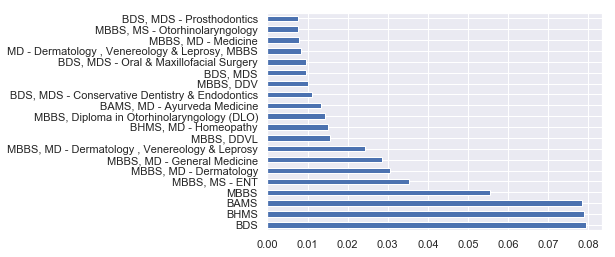

In [414]:
df['Qualification'].value_counts(normalize=True)[:20].plot(kind='barh')

We need to seperate the degree and the specialization from this variable

In [415]:
df['Qualification'].value_counts()

BDS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         632
BHMS                                                                                                                                                                                                                                                                                                                                                                                                    

In [416]:
df['Profile'].value_counts(normalize=True)

Dentist             0.231253
General Medicine    0.203447
Dermatologists      0.172748
Homeopath           0.140916
Ayurveda            0.130473
ENT Specialist      0.121163
Name: Profile, dtype: float64

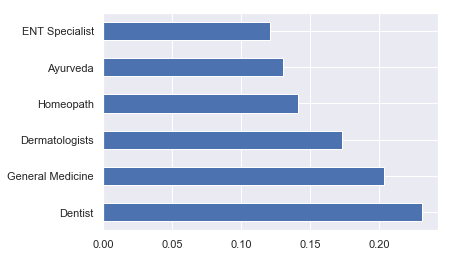

In [417]:
df['Profile'].value_counts(normalize=True).plot(kind='barh')

In [418]:
# Checking the relation between Qualification and profile
# train_data[['Qualification','Profile']]
df_qual_prof = pd.crosstab(df.Qualification, df.Profile, margins=True)
#df_qual_prof.to_csv("df_qual_prof.csv", sep=',')
df_qual_prof.head()

Profile                                                                                                                                                              Ayurveda  \
Qualification                                                                                                                                                                   
39 years experience                                                                                                                                                  0          
Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics  0          
Ayurvedic panchkarma, BAMS                                                                                                                                           1          
B.Ac, BEMS                                                                                                                                                           0          
B.Sc, BAMS                                                                                                                                                           2          

Profile                                                                                                                                                              Dentist  \
Qualification                                                                                                                                                                  
39 years experience                                                                                                                                                  0         
Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics  1         
Ayurvedic panchkarma, BAMS                                                                                                                                           0         
B.Ac, BEMS                                                                                                                                                           0         
B.Sc, BAMS                                                                                                                                                           0         

Profile                                                                                                                                                              Dermatologists  \
Qualification                                                                                                                                                                         
39 years experience                                                                                                                                                  0                
Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics  0                
Ayurvedic panchkarma, BAMS                                                                                                                                           0                
B.Ac, BEMS                                                                                                                                                           0                
B.Sc, BAMS                                                                                                                                                           0                

Profile                                                                                                                                                              ENT Specialist  \
Qualification                                                 

In [419]:
df_qual_prof.sort_values(by=['All'], ascending=False)

Profile                                                                                                                                                                                                                                                                                                                                                                    Ayurveda  \
Qualification                                                                                                                                                                                                                                                                                                                                                                         
All                                                                                                                                                                                                                                                                                                                                                                        1037       
BDS                                                                                                                                                                                                                                                                                                                                                                        0          
BHMS                                                                                                                                                                                                                                                                                                                                                                       0          
BAMS                                                                                                                                                                                                                                                                                                                                                                       623        
MBBS                                                                                                                                                                                                                                                                                                                                                                       0          
MBBS, MS - ENT                                                                                                                                                                                                                                                                                                                                                             0          
MBBS, MD - Dermatology                                                                                                                                                                                                                                                                                                                                                     0          
MBBS, MD - General Medicine                                                                                                                                                                                                                                                                                                                                                0          
MBBS, MD - Dermatology , Venereology & Leprosy                                                                                                                                                                                                            

My aim here is to create certain levels within 'Profile' variable using the 'Qualification' variable. But before that, let us see what is the variation in fee across each profile.

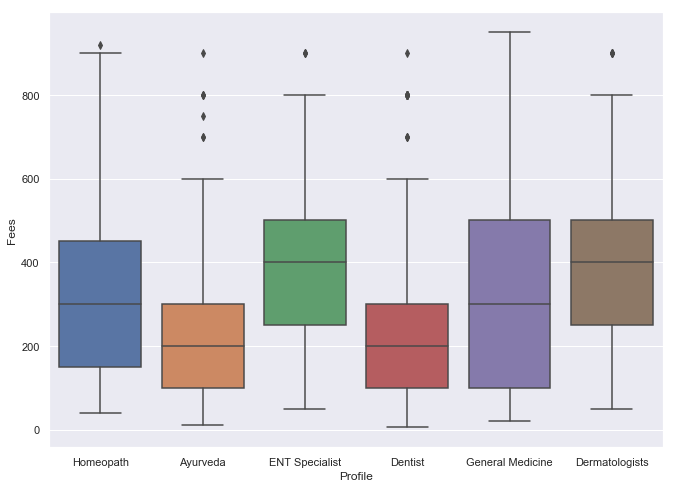

In [420]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x="Profile", y="Fees", data=df[df.train_flag==1])

### Tackling Qualification/Profile

In [421]:
# Deepdive into medical specializations - creating flags based on degree and specializations

#df = df[['Qualification','Profile']]

# Ayurveda
df['ayurveda_bams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b'),1,0)
df['ayurveda_ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ayurveda_md'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# Dentist
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_orthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'orthodon', case=False),1,0)
df['dentist_periodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'periodon', case=False),1,0)
df['dentist_prosthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'prosthodon', case=False),1,0)
df['dentist_oralandmaxi'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
df['dentist_cosmetic'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# Dermatology
df['dermatology_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['dermatology_venereology'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDV\b') | df.Qualification.str.contains(r'venereology', case=False)),1,0)
df['dermatology_leprosy'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDVL\b') | df.Qualification.str.contains(r'leprosy', case=False)),1,0)
df['dermatology_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['dermatology_cosmetic'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# ENT - MS, Otorhinolaryngology, Oncology
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)

# Homeopathy - BHMS, DHMS, MD
df['homeopath_bhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bBHMS\b'),1,0)
df['homeopath_dhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bDHMS\b'),1,0)
df['homeopath_md'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# GM - Cardiology, Orthopedic Surgery, Gastroenterology, Urology, Dermatology, Anesthesiology, Plastic Surgery, Radiology, Emergency Medicine, General Surgery, Diabetology, Child/Pediatrics, Tuberculosis and Chest Diseases, Pharmacology, Maternity, Obstetrics & Gynaecology, Pathology, Pulmonary, Nephrology, Neurology, Sports, Oncology, Acupuncture, Psychiatry, Endocrinology, breast, Rheumatology, Ophthalmology/Opthalmology
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_cardio'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'cardio', case=False),1,0)
df['gm_surgery'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'surgery', case=False),1,0)
df['gm_diabet'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'diabet', case=False),1,0)
df['gm_child'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'child', case=False) | df.Qualification.str.contains(r'pediat', case=False)),1,0)
df['gm_chest'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'chest', case=False) | df.Qualification.str.contains(r'tuber', case=False)),1,0)
df['gm_obstet'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'obstet', case=False) | df.Qualification.str.contains(r'gyna', case=False)),1,0)
df['gm_pulmonary'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'pulmonary', case=False),1,0)
df['gm_psych'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'psych', case=False),1,0)
df['gm_endocrin'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'endocrin', case=False),1,0)
df['gm_rheum'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'rheum', case=False),1,0)

# Create columns for diploma and fellowship?
df[df.Profile == 'Ayurveda'].head(100)
#df.head(100)

Qualification  \
1    BAMS, MD - Ayurveda Medicine                                                                
3    BSc - Zoology, BAMS                                                                         
4    BAMS                                                                                        
5    BAMS                                                                                        
11   BAMS                                                                                        
34   BAMS                                                                                        
42   BAMS, Diploma in Emergency Medicine, Diploma in Counselling Skills                          
43   BAMS                                                                                        
51   BAMS                                                                                        
54   BAMS                                                                                        
82   BAMS                                                                                        
90   BAMS, Post Graduate Diploma in Emergency Services (PGDEMS)                                  
92   BAMS, MD - Acupuncture, Master of Hospital Administration, MS - Psychology                  
98   BAMS                                                                                        
108  BAMS, MS - Ayurveda                                                                         
111  BAMS                                                                                        
119  MD - Ayurveda Medicine, BAMS                                                                
120  BAMS, MS - Ayurveda                                                                         
152  BAMS                                                                                        
154  BAMS                                                                                        
162  BAMS                                                                                        
168  BAMS                                                                                        
172  BAMS                                                                                        
179  BAMS, MD - Ayurveda Medicine                                                                
181  BAMS, MD - Ayurveda Medicine                                                                
194  MD - Ayurveda Medicine                                                                      
199  BAMS                                                                                        
200  BAMS, MS (Shalyatantra), MSc - Yoga                                                         
201  BAMS                                                                                        
203  BAMS                                                                                        
214  BAMS                                                                                        
233  BAMS                                                                                        
248  BAMS, Certificate Course In Therapeutic Yoga                                                
287  BAMS                                                                                        
294  MD - Ayurveda Medicine, BAMS                                                                
301  BAMS, M.S. (Ayurved) Stri Roga & Prasuti Tantra                                             
302  BAMS, MS - Ayurveda, Fellow of Academy of General Education (FAGE)                          
303  BAMS                                                                                        
305  BAMS                                                                                        
312  BAMS                                                                                        
314  MS - Ayurvedic Gynecology & Obstetrics, BAMS              

In [422]:
#df.train_flag==1 & df.Profile == 'Ayurveda'

Text(0.5, 0.98, 'Ayurveda - Profile/Qualifications')

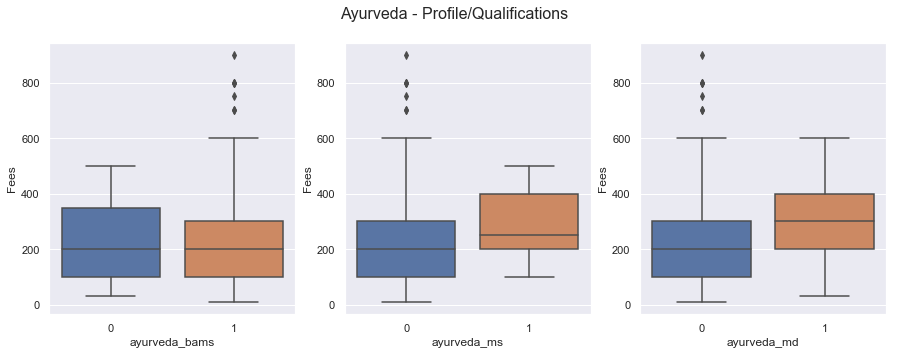

In [423]:
# Ayurveda
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.boxplot(x="ayurveda_bams", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Ayurveda')], ax=ax[0])
sns.boxplot(x="ayurveda_ms", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Ayurveda')], ax=ax[1])
sns.boxplot(x="ayurveda_md", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Ayurveda')], ax=ax[2])
fig.suptitle('Ayurveda - Profile/Qualifications', fontsize=16)
# MS/MD degrees have higher fees

Text(0.5, 0.98, 'Dentist - Profile/Qualifications')

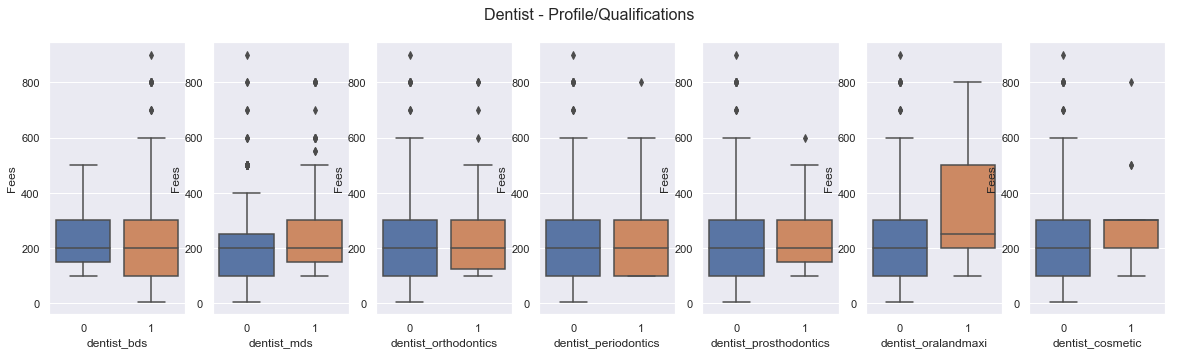

In [424]:
# Dentist
fig, ax = plt.subplots(1, 7, figsize=(20, 5), sharex=True)
sns.boxplot(x="dentist_bds", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[0])
sns.boxplot(x="dentist_mds", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[1])
sns.boxplot(x="dentist_orthodontics", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[2])
sns.boxplot(x="dentist_periodontics", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[3])
sns.boxplot(x="dentist_prosthodontics", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[4])
sns.boxplot(x="dentist_oralandmaxi", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[5])
sns.boxplot(x="dentist_cosmetic", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dentist')], ax=ax[6])
fig.suptitle('Dentist - Profile/Qualifications', fontsize=16)
# MDs and Oral & Maxillofacial Surgery have higher fees

Text(0.5, 0.98, 'Dermatology - Profile/Qualifications')

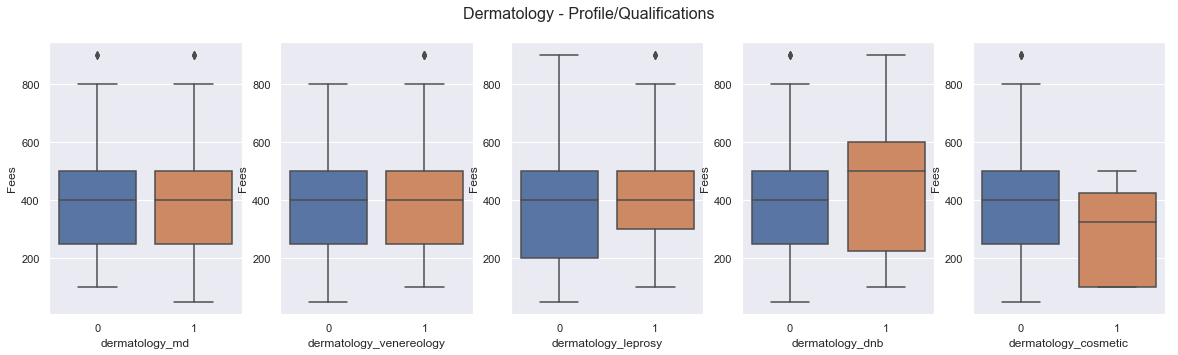

In [425]:
# Dermatology
fig, ax = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
sns.boxplot(x="dermatology_md", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dermatologists')], ax=ax[0])
sns.boxplot(x="dermatology_venereology", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dermatologists')], ax=ax[1])
sns.boxplot(x="dermatology_leprosy", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dermatologists')], ax=ax[2])
sns.boxplot(x="dermatology_dnb", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dermatologists')], ax=ax[3])
sns.boxplot(x="dermatology_cosmetic", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Dermatologists')], ax=ax[4])
fig.suptitle('Dermatology - Profile/Qualifications', fontsize=16)
# DND has high variation, Comsetics have lesser fees

Text(0.5, 0.98, 'ENT Specialist - Profile/Qualifications')

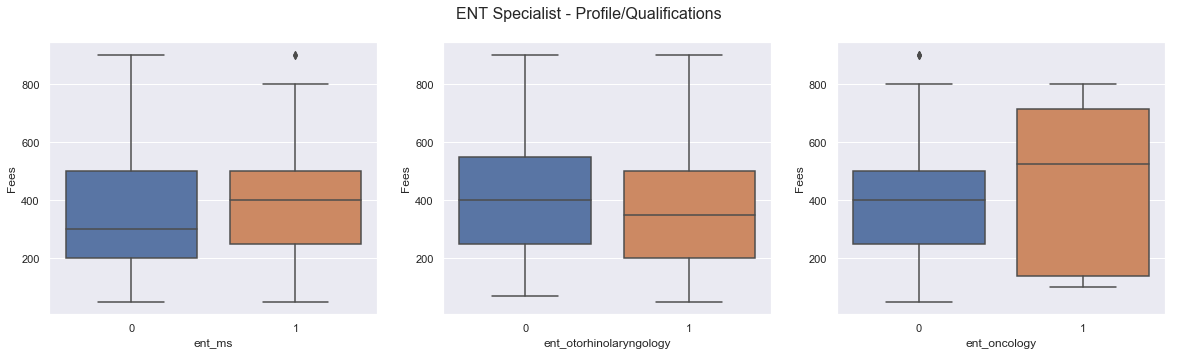

In [426]:
# ENT
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.boxplot(x="ent_ms", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'ENT Specialist')], ax=ax[0])
sns.boxplot(x="ent_otorhinolaryngology", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'ENT Specialist')], ax=ax[1])
sns.boxplot(x="ent_oncology", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'ENT Specialist')], ax=ax[2])
fig.suptitle('ENT Specialist - Profile/Qualifications', fontsize=16)
# Oncology has a high variation in fees

Text(0.5, 0.98, 'Homeopath - Profile/Qualifications')

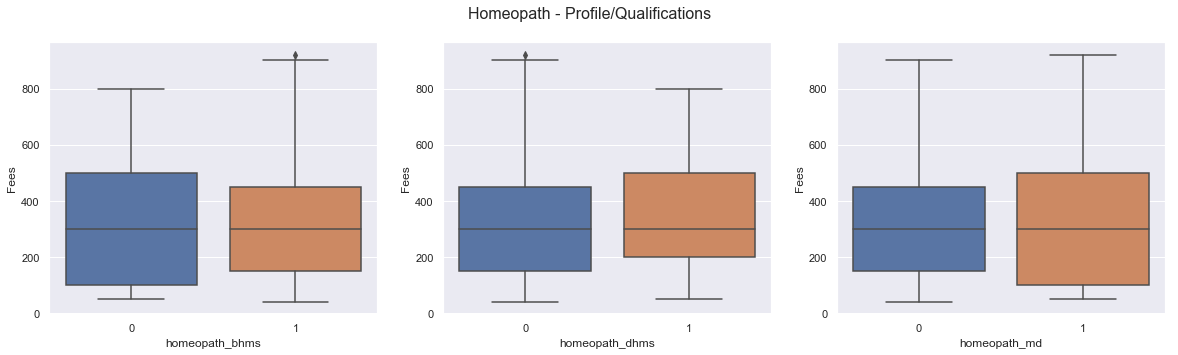

In [427]:
# Homeopathy
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.boxplot(x="homeopath_bhms", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Homeopath')], ax=ax[0])
sns.boxplot(x="homeopath_dhms", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Homeopath')], ax=ax[1])
sns.boxplot(x="homeopath_md", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'Homeopath')], ax=ax[2])
fig.suptitle('Homeopath - Profile/Qualifications', fontsize=16)
# Not much variation across degrees

Text(0.5, 0.98, 'General Medicine - Profile/Qualifications')

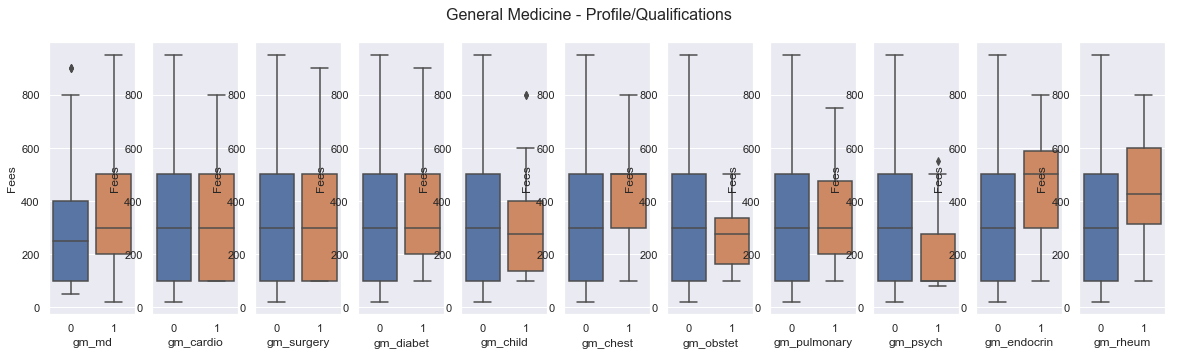

In [428]:
# GM
fig, ax = plt.subplots(1, 11, figsize=(20, 5), sharex=True)
sns.boxplot(x="gm_md", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[0])
sns.boxplot(x="gm_cardio", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[1])
sns.boxplot(x="gm_surgery", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[2])
sns.boxplot(x="gm_diabet", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[3])
sns.boxplot(x="gm_child", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[4])
sns.boxplot(x="gm_chest", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[5])
sns.boxplot(x="gm_obstet", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[6])
sns.boxplot(x="gm_pulmonary", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[7])
sns.boxplot(x="gm_psych", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[8])
sns.boxplot(x="gm_endocrin", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[9])
sns.boxplot(x="gm_rheum", y="Fees", data=df[(df.train_flag==1) & (df.Profile == 'General Medicine')], ax=ax[10])
fig.suptitle('General Medicine - Profile/Qualifications', fontsize=16)
# Higher for - MD, Chest, Endocrin, Rheum; Lower for Child, Obstetrics, Psych

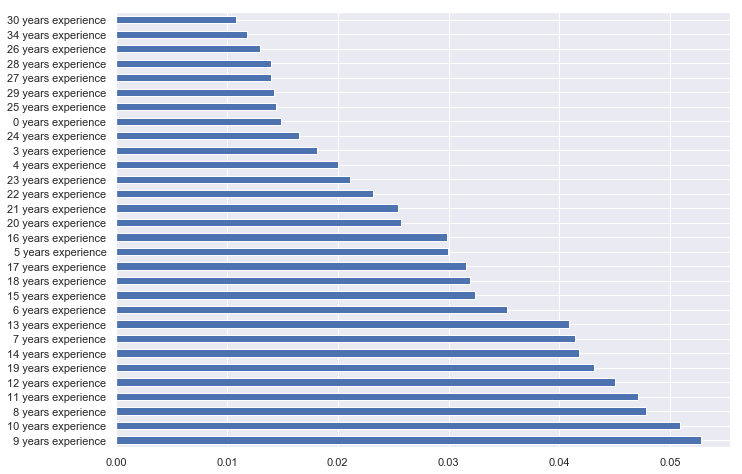

In [429]:
df['Experience'].value_counts(normalize=True)[:30].plot(kind='barh')

In [430]:
df['exp_years'] = df['Experience'].str.replace(' years experience','').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 41 columns):
Qualification              7948 non-null object
Experience                 7948 non-null object
Rating                     3556 non-null object
Place                      7917 non-null object
Profile                    7948 non-null object
Miscellaneous_Info         4494 non-null object
Fees                       5961 non-null float64
train_flag                 7948 non-null int32
ayurveda_bams              7948 non-null int32
ayurveda_ms                7948 non-null int32
ayurveda_md                7948 non-null int32
dentist_bds                7948 non-null int32
dentist_mds                7948 non-null int32
dentist_orthodontics       7948 non-null int32
dentist_periodontics       7948 non-null int32
dentist_prosthodontics     7948 non-null int32
dentist_oralandmaxi        7948 non-null int32
dentist_cosmetic           7948 non-null int32
dermatology_md             7948 non-nul

count    7948.000000
mean     17.446653  
std      11.201217  
min      0.000000   
25%      9.000000   
50%      15.000000  
75%      23.000000  
max      66.000000  
Name: exp_years, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A75ECD30>]],
      dtype=object)

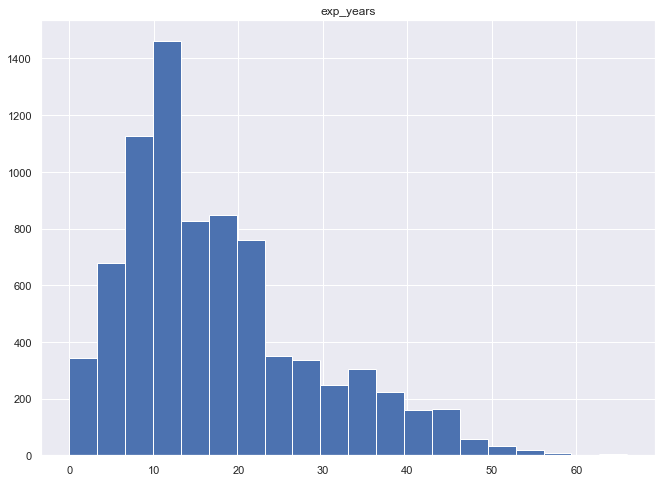

In [431]:
print(df['exp_years'].describe())
df.hist(column='exp_years', bins=20)

0.0021166362355417856


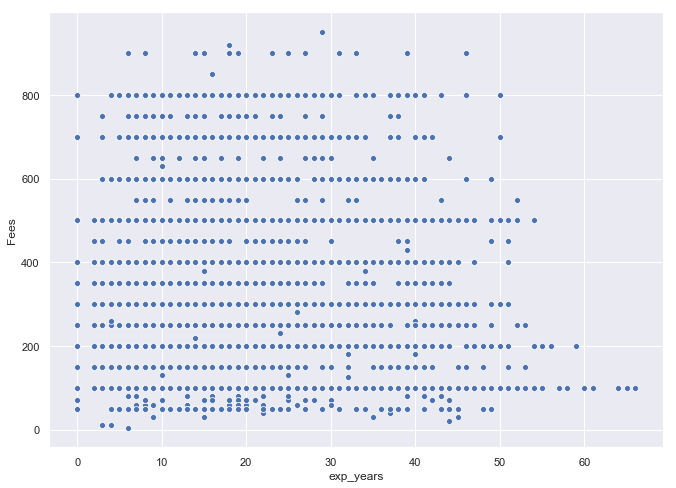

In [432]:
sns.scatterplot(x="exp_years", y="Fees", data=df[df.train_flag==1])
print(df[df.train_flag==1]['Fees'].corr(df[df.train_flag==1]['exp_years']))
# Experience has almost no relationship with the fees

count    7948.000000
mean     2.711874   
std      0.691969   
min      0.000000   
25%      2.302585   
50%      2.772589   
75%      3.178054   
max      4.204693   
Name: exp_years_log, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A7864278>]],
      dtype=object)

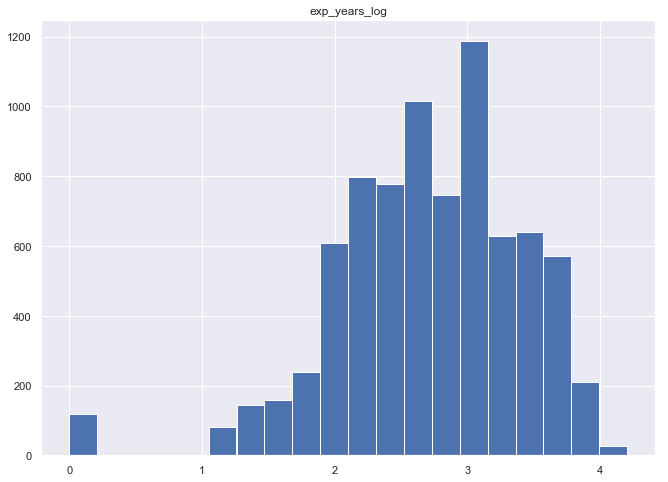

In [433]:
df['exp_years_log'] = np.log1p(df['exp_years'])
print(df['exp_years_log'].describe())
df.hist(column='exp_years_log', bins=20)

0.05934325072336071


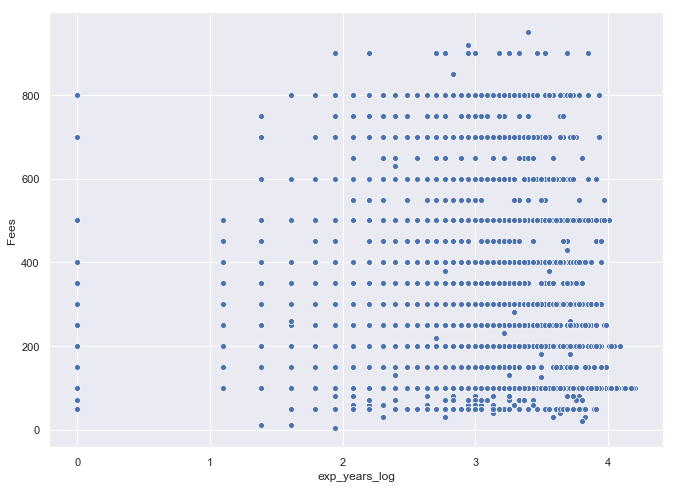

In [434]:
sns.scatterplot(x="exp_years_log", y="Fees", data=df[df.train_flag==1])
print(df[df.train_flag==1]['Fees'].corr(df[df.train_flag==1]['exp_years_log']))

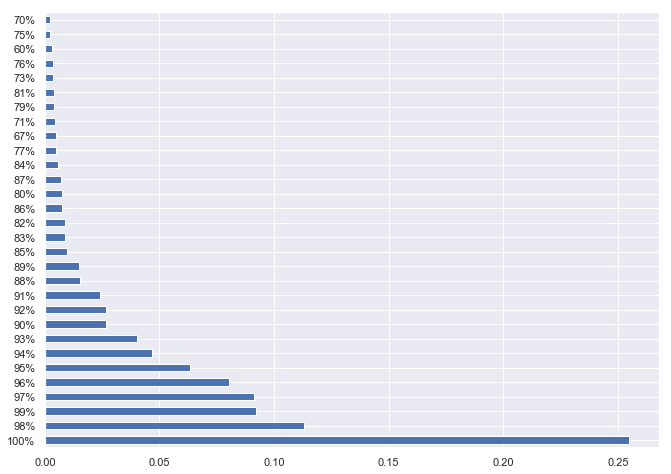

In [435]:
df['Rating'].value_counts(normalize=True)[:30].plot(kind='barh')

In [436]:
df['rating_number'] = df['Rating'].str.replace('%','').astype('float64')
df.describe()

Fees  train_flag  ayurveda_bams  ayurveda_ms  ayurveda_md  \
count  5961.000000  7948.00000  7948.000000    7948.000000  7948.000000   
mean   307.944640   0.75000     0.126069       0.006920     0.027428      
std    190.920373   0.43304     0.331949       0.082903     0.163338      
min    5.000000     0.00000     0.000000       0.000000     0.000000      
25%    150.000000   0.75000     0.000000       0.000000     0.000000      
50%    300.000000   1.00000     0.000000       0.000000     0.000000      
75%    500.000000   1.00000     0.000000       0.000000     0.000000      
max    950.000000   1.00000     1.000000       1.000000     1.000000      

       dentist_bds  dentist_mds  dentist_orthodontics  dentist_periodontics  \
count  7948.000000  7948.000000  7948.000000           7948.000000            
mean   0.225214     0.125818     0.025038              0.016230               
std    0.417749     0.331665     0.156250              0.126369               
min    0.000000     0.000000     0.000000              0.000000               
25%    0.000000     0.000000     0.000000              0.000000               
50%    0.000000     0.000000     0.000000              0.000000               
75%    0.000000     0.000000     0.000000              0.000000               
max    1.000000     1.000000     1.000000              1.000000               

       dentist_prosthodontics  ...     gm_child     gm_chest    gm_obstet  \
count  7948.000000             ...  7948.000000  7948.000000  7948.000000   
mean   0.020760                ...  0.006668     0.003145     0.002139      
std    0.142589                ...  0.081392     0.056000     0.046202      
min    0.000000                ...  0.000000     0.000000     0.000000      
25%    0.000000                ...  0.000000     0.000000     0.000000      
50%    0.000000                ...  0.000000     0.000000     0.000000      
75%    0.000000                ...  0.000000     0.000000     0.000000      
max    1.000000                ...  1.000000     1.000000     1.000000      

       gm_pulmonary     gm_psych  gm_endocrin     gm_rheum    exp_years  \
count  7948.000000   7948.000000  7948.000000  7948.000000  7948.000000   
mean   0.002642      0.002013     0.002642     0.001510     17.446653     
std    0.051337      0.044825     0.051337     0.038829     11.201217     
min    0.000000      0.000000     0.000000     0.000000     0.000000      
25%    0.000000      0.000000     0.000000     0.000000     9.000000      
50%    0.000000      0.000000     0.000000     0.000000     15.000000     
75%    0.000000      0.000000     0.000000     0.000000     23.000000     
max    1.000000      1.000000     1.000000     1.000000     66.000000     

       exp_years_log  rating_number  
count  7948.000000    3556.000000    
mean   2.711874       94.592520      
std    0.691969       7.783725       
min    0.000000       7.000000       
25%    2.302585       93.000000      
50%    2.772589       97.000000      
75%    3.178054       100.000000     
max    4.204693       100.000000     

[8 rows x 37 columns]

count    3556.000000
mean     94.592520  
std      7.783725   
min      7.000000   
25%      93.000000  
50%      97.000000  
75%      100.000000 
max      100.000000 
Name: rating_number, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A7AD5A58>]],
      dtype=object)

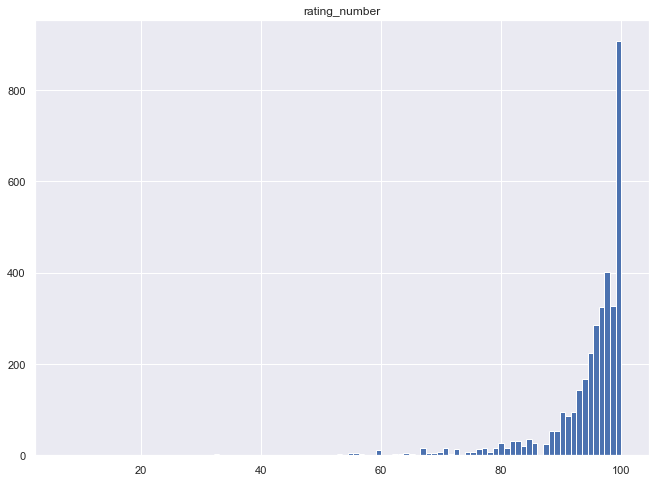

In [437]:
print(df['rating_number'].describe())
df.hist(column='rating_number', bins=100)

In [438]:
df[df.train_flag==1]['Fees'].corr(df[df.train_flag==1]['rating_number'])

-0.13357160193853274

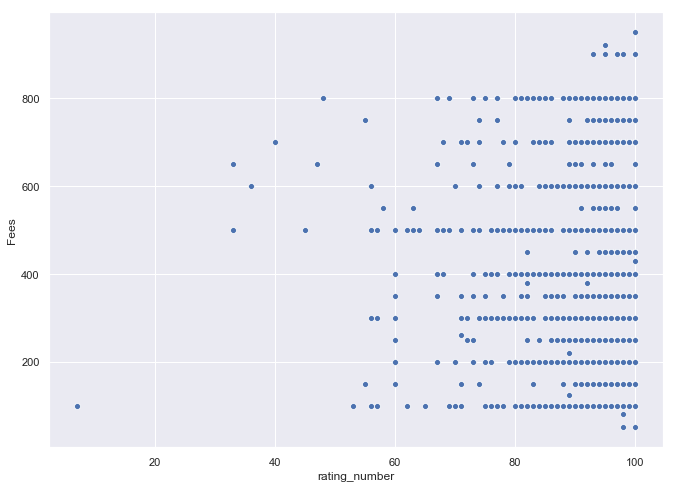

In [439]:
sns.scatterplot(x="rating_number", y="Fees", data=df[df.train_flag==1])

55% of rating is NaN and there's no correlation of Rating with Fees

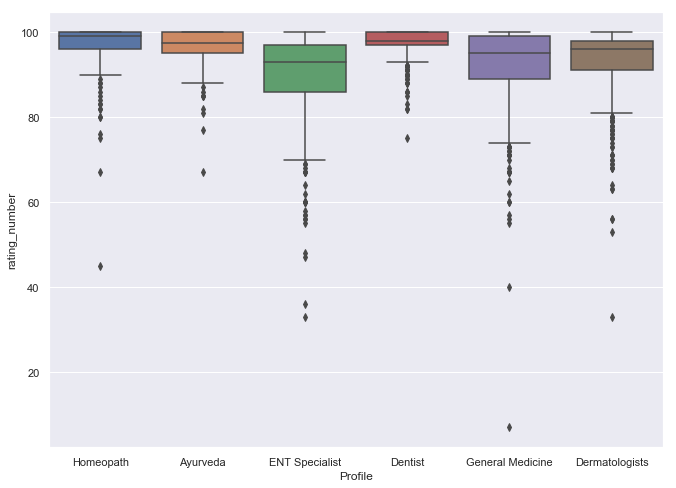

In [440]:
sns.boxplot(x="Profile", y="rating_number", data=df[df.train_flag==1])

In [441]:
#sns.boxplot(x="city", y="rating_number", data=df[df.train_flag==1])

In [442]:
print(df['rating_number'].mean())
print(df['rating_number'].median())

94.59251968503936
97.0


In [443]:
# No such correlation of Rating with Profile or Place
# Treat missing value with Mean and median rating
df['rating_mean_imputed'] = df['rating_number'].fillna((df['rating_number'].mean()))
df['rating_median_imputed'] = df['rating_number'].fillna((df['rating_number'].median()))

In [444]:
df['rating_mean_imputed_log'] = np.log(df['rating_mean_imputed'])
df['rating_median_imputed_log'] = np.log(df['rating_median_imputed'])

count    7948.000000
mean     4.561462   
std      0.071321   
min      1.945910   
25%      4.574711   
50%      4.574711   
75%      4.574711   
max      4.605170   
Name: rating_median_imputed_log, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A86EBE48>]],
      dtype=object)

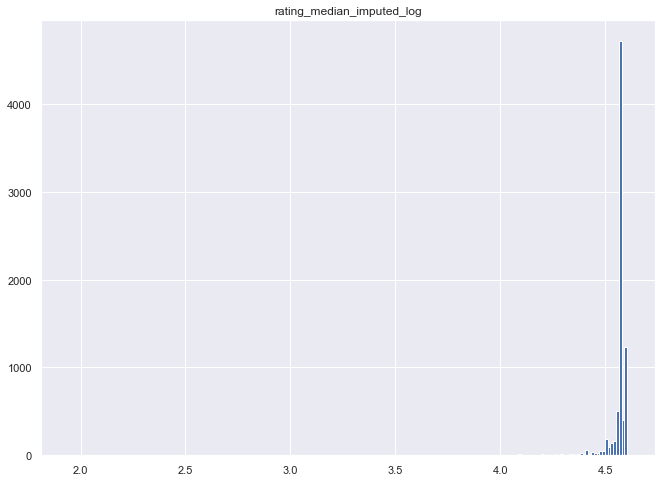

In [445]:
print(df['rating_median_imputed_log'].describe())
df.hist(column='rating_median_imputed_log', bins=200)

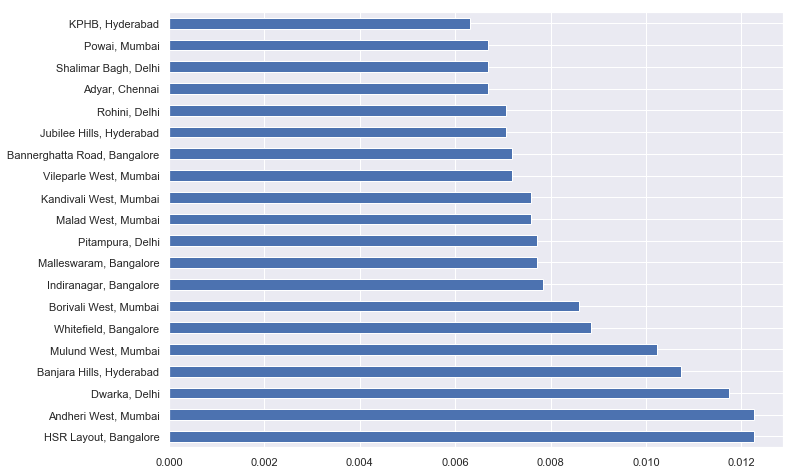

In [446]:
df['Place'].value_counts(normalize=True)[:20].plot(kind='barh')

In [447]:
df['Place'].value_counts(normalize=True)

HSR Layout, Bangalore                     0.012252
Andheri West, Mumbai                      0.012252
Dwarka, Delhi                             0.011747
Banjara Hills, Hyderabad                  0.010736
Mulund West, Mumbai                       0.010231
Whitefield, Bangalore                     0.008842
Borivali West, Mumbai                     0.008589
Indiranagar, Bangalore                    0.007831
Malleswaram, Bangalore                    0.007705
Pitampura, Delhi                          0.007705
Malad West, Mumbai                        0.007579
Kandivali West, Mumbai                    0.007579
Vileparle West, Mumbai                    0.007200
Bannerghatta Road, Bangalore              0.007200
Jubilee Hills, Hyderabad                  0.007073
Rohini, Delhi                             0.007073
Adyar, Chennai                            0.006694
Shalimar Bagh, Delhi                      0.006694
Powai, Mumbai                             0.006694
KPHB, Hyderabad                

In [448]:
pd.options.display.max_rows

1000

In [449]:
pd.set_option('display.max_rows', 1000)
df['Place'].str.split(', ', expand=True)

0                   1     2
0     Kakkanad                Ernakulam           None
1     Whitefield              Bangalore           None
2     Mathikere - BEL         Bangalore           None
3     Bannerghatta Road       Bangalore           None
4     Keelkattalai            Chennai             None
5     Porur                   Chennai             None
6     Karol Bagh              Delhi               None
7     Arekere                 Bangalore           None
8     Old City                Hyderabad           None
9     Athani                  Ernakulam           None
10    Thousand Lights         Chennai             None
11    Somajiguda              Hyderabad           None
12    Coimbatore Racecourse   Coimbatore          None
13    Jubilee Hills           Hyderabad           None
14    Kondli                  Delhi               None
15    Saroor Nagar            Hyderabad           None
16    Tambaram West           Chennai             None
17    Purasawakkam            Chennai             None
18    KPHB                    Hyderabad           None
19    HSR Layout              Bangalore           None
20    Pollachi                Coimbatore          None
21    Vasundhra Enclave       Delhi               None
22    Chembur                 Mumbai              None
23    Thammanam               Ernakulam           None
24    Andheri                 Mumbai              None
25    Pattom                  Thiruvananthapuram  None
26    HSR Layout              Bangalore           None
27    Kukatpally              Hyderabad           None
28    Vadavalli               Coimbatore          None
29    Defence Colony          Delhi               None
30    Banjara Hills           Hyderabad           None
31    Sion West               Mumbai              None
32    CR Park                 Delhi               None
33    Mogappair East          Chennai             None
34    IP Extension            Delhi               None
35    Safdarjung Enclave      Delhi               None
36    New Friends Colony      Delhi               None
37    Borivali West           Mumbai              None
38    Saket                   Delhi               None
39    Malad                   Mumbai              None
40    Hyder Nagar             Hyderabad           None
41    Dahisar West            Mumbai              None
42    RT Nagar                Bangalore           None
43    Saroor Nagar            Hyderabad           None
44    Powai                   Mumbai              None
45    Basheerbagh             Hyderabad           None
46    Musheerabad             Hyderabad           None
47    AS Rao Nagar            Hyderabad           None
48    Madhapur                Hyderabad           None
49    Coimbatore Racecourse   Coimbatore          None
50    Gandhinagar             Hyderabad           None
51    Chetpet                 Chennai             None
52    Madhapur                Hyderabad           None
53    Vileparle East          Mumbai              None
54    KPHB                    Hyderabad           None
55    Whitefield              Bangalore           None
56    Yelahanka New Town      Bangalore           None
57    Bannerghatta Road       Bangalore           None
58    Kodambakkam             Chennai             None
59    Malleswaram             Bangalore           None
60    Pallikaranai            Chennai             None
61    Nallakunta              Hyderabad           None
62    Paschim Vihar           Delhi               None
63    Meera Bagh              Delhi               None
64    Chattarpur              Delhi               None
65    HSR Layout              Bangalore           None
66    Andheri West            Mumbai              None
67    Himayat Nagar           Hyderabad           None
68    Adambakkam              Chennai             None
69    Punjabi Bagh            Delhi               None
70    Saket                   Delhi               None
71    Paschim Vihar           Delhi               None
72    Mahala

In [450]:
# Just making the below place single comma, so its easy to seperate the entire column
df.loc[train_data.Place == 'Dwarka, Sector 5, Delhi', 'Place'] = 'Dwarka Sector 5, Delhi'
df[['area','city']] = df['Place'].str.split(', ', expand=True)
df.head()

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place         Profile  \
0  Kakkanad, Ernakulam           Homeopath        
1  Whitefield, Bangalore         Ayurveda         
2  Mathikere - BEL, Bangalore    ENT Specialist   
3  Bannerghatta Road, Bangalore  Ayurveda         
4  Keelkattalai, Chennai         Ayurveda         

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  ayurveda_bams  ayurveda_ms  ...  gm_rheum  exp_years  \
0  1           0              0            ...  0         24          
1  1           1              0            ...  0         12          
2  1           0              0            ...  0         9           
3  1           1              0            ...  0         12          
4  1           1              0            ...  0         20          

   exp_years_log  rating_number  rating_mean_imputed  rating_median_imputed  \
0  3.218876       100.0          100.00000            100.0                   
1  2.564949       98.0           98.00000             98.0                    
2  2.302585      NaN             94.59252             97.0                    
3  2.564949      NaN             94.59252             97.0                    
4  3.044522       100.0          100.00000            100.0                   

   rating_mean_imputed_log  rating_median_imputed_log               area  \
0  4.605170                 4.605170                   Kakkanad            
1  4.584967                 4.584967                   Whitefield          
2  4.549578                 4.574711                   Mathikere - BEL     
3  4.549578                 4.574711                   Bannerghatta Road   
4  4.605170                 4.605170                   Keelkattalai        

        city  
0  Ernakulam  
1  Bangalore  
2  Bangalore  
3  Bangalore  
4  Chennai    

[5 rows x 49 columns]

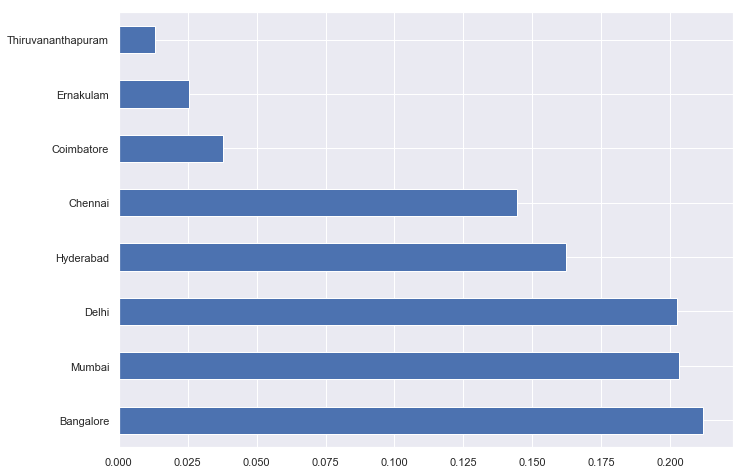

In [451]:
df['city'].value_counts(normalize=True).plot(kind='barh')

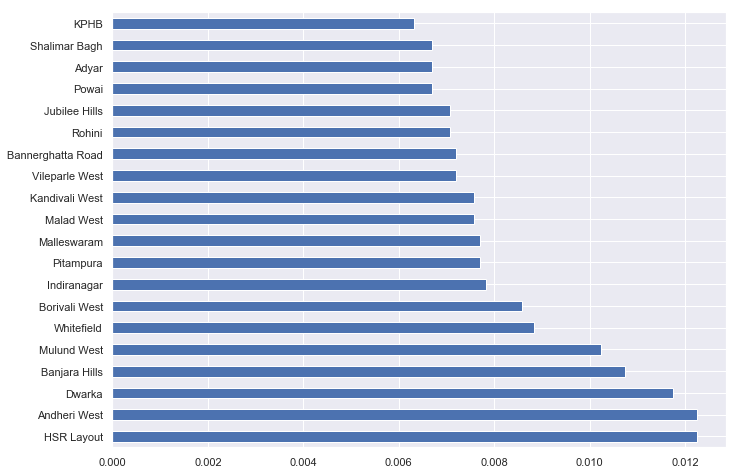

In [452]:
df['area'].value_counts(normalize=True)[:20].plot(kind='barh')

In [453]:
df[df.city.isnull()]

Qualification  \
91    Get inspired by remarkable stories of people like you   
502   Get inspired by remarkable stories of people like you   
599   Get inspired by remarkable stories of people like you   
605   Get inspired by remarkable stories of people like you   
724   Get inspired by remarkable stories of people like you   
1002  Get inspired by remarkable stories of people like you   
1083  Get inspired by remarkable stories of people like you   
1210  Get inspired by remarkable stories of people like you   
2078  Get inspired by remarkable stories of people like you   
2178  Get inspired by remarkable stories of people like you   
2328  Get inspired by remarkable stories of people like you   
3099  Get inspired by remarkable stories of people like you   
3228  Get inspired by remarkable stories of people like you   
3418  Get inspired by remarkable stories of people like you   
3443  Get inspired by remarkable stories of people like you   
3744  Get inspired by remarkable stories of people like you   
3804  Get inspired by remarkable stories of people like you   
3980  BDS                                                     
4004  Get inspired by remarkable stories of people like you   
4758  Get inspired by remarkable stories of people like you   
4823  MBBS, DDVL                                              
4847  Get inspired by remarkable stories of people like you   
5058  Get inspired by remarkable stories of people like you   
5187  Get inspired by remarkable stories of people like you   
5551  Get inspired by remarkable stories of people like you   
5723  Get inspired by remarkable stories of people like you   
381   Get inspired by remarkable stories of people like you   
1494  Get inspired by remarkable stories of people like you   
1644  Get inspired by remarkable stories of people like you   
1838  Get inspired by remarkable stories of people like you   
1925  Get inspired by remarkable stories of people like you   
1930  Get inspired by remarkable stories of people like you   

               Experience Rating Place         Profile Miscellaneous_Info  \
91    0 years experience   NaN    NaN   Dermatologists  NaN                 
502   0 years experience   NaN    NaN   Dermatologists  NaN                 
599   0 years experience   NaN    NaN   Dermatologists  NaN                 
605   0 years experience   NaN    NaN   Dermatologists  NaN                 
724   0 years experience   NaN    NaN   Dermatologists  NaN                 
1002  0 years experience   NaN    NaN   Dermatologists  NaN                 
1083  0 years experience   NaN    NaN   Dermatologists  NaN                 
1210  0 years experience   NaN    NaN   Dermatologists  NaN                 
2078  0 years experience   NaN    NaN   Dermatologists  NaN                 
2178  0 years experience   NaN    NaN   Dermatologists  NaN                 
2328  0 years experience   NaN    NaN   Dermatologists  NaN                 
3099  0 years experience   NaN    NaN   Dermatologists  NaN                 
3228  0 years experience   NaN    NaN   Dermatologists  NaN                 
3418  0 years experience   NaN    NaN   Dermatologists  NaN                 
3443  0 years experience   NaN    NaN   Dermatologists  NaN                 
3744  0 years experience   NaN    NaN   Dermatologists  NaN                 
3804  0 years experience   NaN    NaN   Dermatologists  NaN                 
3980  23 years experience  NaN    e     Dentist         NaN                 
4004  0 years experience   NaN    NaN   Dermatologists  NaN                 
4758  0 years experience   NaN    NaN   Dermatologists  NaN                 
4823  22 years experience  NaN    NaN   Dermatologists  NaN                 
4847  0 years experience   NaN    NaN   Dermatologists  NaN                 
5058  0 years experience   NaN    NaN   Dermatologists  NaN                 
5187  0 years experience   NaN    NaN   Dermatologists  NaN                 
5551  0 years experience   NaN    NaN   D

1. There are 32 rows where place is NULL. We will replace it with Mode
2. There is a place called 'e' - This seems like a data entry issue and we will replace it with mode for area and city
3. All the rows where place is NULL, qualification is 'Get inspired by remarkable stories of people like you'. Might be a data capture issue or a default value if the information is not filled

In [454]:
print(df.area.mode())
print(df.city.mode())

0    Andheri West
1    HSR Layout  
dtype: object
0    Bangalore
dtype: object


In [455]:
# Although HSR and Andheri are modes, since we are replacing city with Bangalore, we will replace area with 'HSR Layout'
df.area[(df.Place.isnull()) | (df.Place=='e')] = 'HSR Layout'
df.city[(df.Place.isnull()) | (df.Place=='e')] = 'Bangalore'

C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [456]:
df[df.area.isnull()]

Empty DataFrame
Columns: [Qualification, Experience, Rating, Place, Profile, Miscellaneous_Info, Fees, train_flag, ayurveda_bams, ayurveda_ms, ayurveda_md, dentist_bds, dentist_mds, dentist_orthodontics, dentist_periodontics, dentist_prosthodontics, dentist_oralandmaxi, dentist_cosmetic, dermatology_md, dermatology_venereology, dermatology_leprosy, dermatology_dnb, dermatology_cosmetic, ent_ms, ent_otorhinolaryngology, ent_oncology, homeopath_bhms, homeopath_dhms, homeopath_md, gm_md, gm_cardio, gm_surgery, gm_diabet, gm_child, gm_chest, gm_obstet, gm_pulmonary, gm_psych, gm_endocrin, gm_rheum, exp_years, exp_years_log, rating_number, rating_mean_imputed, rating_median_imputed, rating_mean_imputed_log, rating_median_imputed_log, area, city]
Index: []

[0 rows x 49 columns]

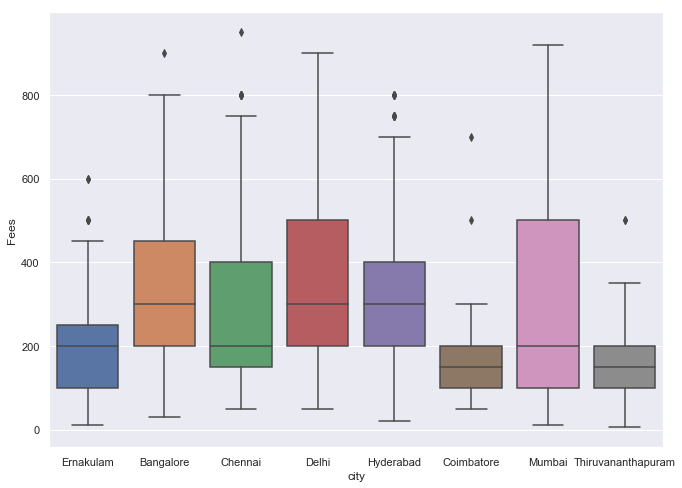

In [457]:
sns.boxplot(x="city", y="Fees", data=df[df.train_flag==1])
# City seems to be a good predictor

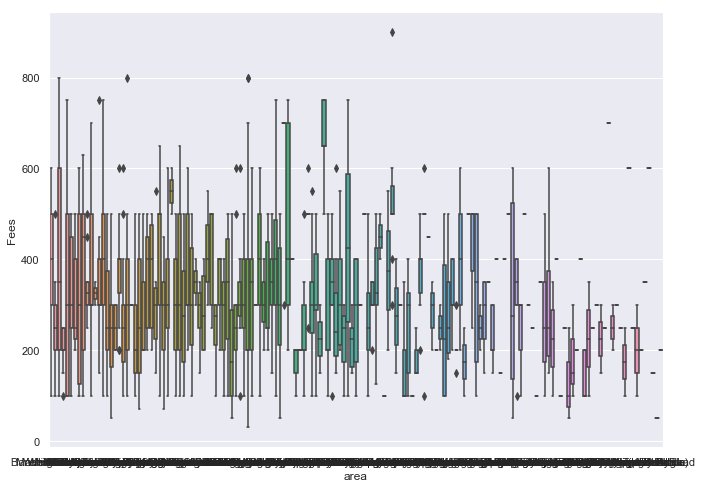

In [458]:
sns.boxplot(x="area", y="Fees", data=df[(df.train_flag==1) & (df.city == 'Bangalore')])

In [459]:
# Let us the distinct areas in each city and then think about ways to group them
df.groupby('city').area.nunique()
# Total 936 unique areas

city
Bangalore             166
Chennai               134
Coimbatore            50 
Delhi                 218
Ernakulam             59 
Hyderabad             145
Mumbai                121
Thiruvananthapuram    53 
Name: area, dtype: int64

In [460]:
df[df.city == 'Bangalore'].area.value_counts(normalize=True)
df.groupby(['city','area']).size()
df_city_area = df[df.train_flag==1].groupby(['city','area']).agg({'Fees':
                                  {'mean_fee': np.mean, 'median_fee': np.median}}).reset_index()
#agg({'Doctors':'count','mean_fee':np.mean(),'median_fee':np.median()})
#df_city_area.reset_index(level=['city','area'], inplace=True)
df_city_area.columns = ['city','area','mean_fee','median_fee']
df_city_area.head()

C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


city           area    mean_fee  median_fee
0  Bangalore  AECS Layout    500.000000  500.0     
1  Bangalore  Abbigere       100.000000  100.0     
2  Bangalore  Adugodi        225.000000  225.0     
3  Bangalore  Akshaya nagar  250.000000  250.0     
4  Bangalore  Arekere        208.333333  200.0

In [461]:
df[df.city == 'Bangalore'].area.value_counts(normalize=True)
df.groupby(['city','area']).size()
df_city_area = df[df.train_flag==1].groupby(['city','area']).agg({'Fees':
                                  {'mean_fee': np.mean, 'median_fee': np.median}}).reset_index()
#agg({'Doctors':'count','mean_fee':np.mean(),'median_fee':np.median()})
#df_city_area.reset_index(level=['city','area'], inplace=True)
df_city_area.columns = ['city','area','mean_fee','median_fee']
#df_city_area.head()

# Making area groups based on avg. fees  and median fees in that area

df_city_area['area_group_mean_fee'] = np.where(df_city_area.mean_fee<=100,'A',
                                     np.where(df_city_area.mean_fee<=200,'B',
                                         np.where(df_city_area.mean_fee<=250,'C',
                                                  np.where(df_city_area.mean_fee<=300,'D',
                                                           np.where(df_city_area.mean_fee<=350,'E',
                                                           np.where(df_city_area.mean_fee<=400,'F',
                                                                         np.where(df_city_area.mean_fee<=500,'G','H')))))))

df_city_area['area_group_median_fee'] = np.where(df_city_area.median_fee<=100,'A',
                                     np.where(df_city_area.median_fee<=200,'B',
                                         np.where(df_city_area.median_fee<=250,'C',
                                                  np.where(df_city_area.median_fee<=300,'D',
                                                           np.where(df_city_area.median_fee<=350,'E',
                                                           np.where(df_city_area.median_fee<=400,'F',
                                                                         np.where(df_city_area.median_fee<=500,'G','H')))))))

df_city_area['area_group_median_fee1'] = np.where(df_city_area.median_fee<=50,'A',
                                     np.where(df_city_area.median_fee<=100,'B',
                                         np.where(df_city_area.median_fee<=150,'C',
                                                  np.where(df_city_area.median_fee<=200,'D',
                                                           np.where(df_city_area.median_fee<=250,'E',
                                                           np.where(df_city_area.median_fee<=300,'F',
                                                                    np.where(df_city_area.median_fee<=350,'G',
                                                                             np.where(df_city_area.median_fee<=400,'H',
                                                                                      np.where(df_city_area.median_fee<=450,'I',
                                                                         np.where(df_city_area.median_fee<=500,'J','K'))))))))))



df_city_area.head(100)

city                    area    mean_fee  median_fee  \
0   Bangalore  AECS Layout             500.000000  500.0        
1   Bangalore  Abbigere                100.000000  100.0        
2   Bangalore  Adugodi                 225.000000  225.0        
3   Bangalore  Akshaya nagar           250.000000  250.0        
4   Bangalore  Arekere                 208.333333  200.0        
5   Bangalore  Austin Town             400.000000  400.0        
6   Bangalore  BTM Layout              321.428571  300.0        
7   Bangalore  BTM Layout 1st Stage    366.666667  400.0        
8   Bangalore  BTM Layout 2nd Stage    269.565217  250.0        
9   Bangalore  Banashankari            308.333333  300.0        
10  Bangalore  Banashankari 1st Stage  250.000000  200.0        
11  Bangalore  Banashankari 2nd Stage  346.875000  325.0        
12  Bangalore  Banashankari 3rd Stage  261.363636  250.0        
13  Bangalore  Banaswadi               277.777778  250.0        
14  Bangalore  Bannerghatta Road       410.256410  350.0        
15  Bangalore  Basavanagudi            340.625000  300.0        
16  Bangalore  Basaveshwaranagar       263.333333  250.0        
17  Bangalore  Begur                   283.333333  300.0        
18  Bangalore  Bellandur               342.592593  300.0        
19  Bangalore  Bilekahalli             300.000000  300.0        
20  Bangalore  Bommanahalli            325.000000  325.0        
21  Bangalore  CV Raman Nagar          359.090909  400.0        
22  Bangalore  Chamarajpet             300.000000  300.0        
23  Bangalore  Chandra Layout          225.000000  225.0        
24  Bangalore  Cunningham Road         600.000000  600.0        
25  Bangalore  Dasarahalli             250.000000  250.0        
26  Bangalore  Dickenson Road          600.000000  600.0        
27  Bangalore  Doddanekundi            225.000000  225.0        
28  Bangalore  Domlur                  418.750000  500.0        
29  Bangalore  Dommasandra             175.000000  175.0        
30  Bangalore  Electronics City        271.764706  300.0        
31  Bangalore  Frazer Town             330.000000  300.0        
32  Bangalore  Ganganagar              500.000000  500.0        
33  Bangalore  Gottigerre              300.000000  300.0        
34  Bangalore  HAL                     200.000000  200.0        
35  Bangalore  HAL 2nd Stage           416.666667  500.0        
36  Bangalore  HBR Layout              275.000000  250.0        
37  Bangalore  HRBR Layout             355.555556  350.0        
38  Bangalore  HSR Layout              281.673267  300.0        
39  Bangalore  Harlur                  700.000000  700.0        
40  Bangalore  Hebbal                  450.000000  400.0        
41  Bangalore  Hebbal Kempapura        300.000000  300.0        
42  Bangalore  Hegde Nagar             250.000000  250.0        
43  Bangalore  Hennur                  150.000000  150.0        
44  Bangalore  Hoodi                   100.000000  100.0        
45  Bangalore  Horamavu                380.000000  300.0        
46  Bangalore  Hulimavu                300.000000  300.0        
47  Bangalore  Indiranagar             397.916667  400.0        
48  Bangalore  J.C Nagar               200.000000  200.0        
49  Bangalore  JP Nagar                262.500000  225.0        
50  Bangalore  JP Nagar 1 Phase        230.000000  200.0        
51  Bangalore  JP Nagar 2 Phase        322.727273  350.0        
52  Bangalore  JP Nagar 3 Phase        366.666667  400.0        
53  Bangalore  JP Nagar 4 Phase        200.000000  200.0        
54  Bangalore  JP Nagar 5 Phase        164.285714  100.0        
55  Bangalore  JP Nagar 6 Phase        210.000000  200.0        
56  Bangalore  JP Nagar 7 Phase        334.615385  350.0        
57  Bangalore  JP Nagar 8 Phase        400.000000  400.0        
58  Bangalore  Jakkur                  287.500000  275.0        
59  Bangalore  Jalahalli               233.333333  300.0        
60  Bangalore  Jayamahal               300.0

In [462]:
# Join this flag to the original df based on the city and area
df = df.merge(df_city_area[['city','area','area_group_mean_fee','area_group_median_fee','area_group_median_fee1']], how = 'left', on = ['city','area'])
df.head()

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place         Profile  \
0  Kakkanad, Ernakulam           Homeopath        
1  Whitefield, Bangalore         Ayurveda         
2  Mathikere - BEL, Bangalore    ENT Specialist   
3  Bannerghatta Road, Bangalore  Ayurveda         
4  Keelkattalai, Chennai         Ayurveda         

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  ayurveda_bams  ayurveda_ms  ...  rating_number  \
0  1           0              0            ...  100.0           
1  1           1              0            ...  98.0            
2  1           0              0            ... NaN              
3  1           1              0            ... NaN              
4  1           1              0            ...  100.0           

   rating_mean_imputed  rating_median_imputed  rating_mean_imputed_log  \
0  100.00000            100.0                  4.605170                  
1  98.00000             98.0                   4.584967                  
2  94.59252             97.0                   4.549578                  
3  94.59252             97.0                   4.549578                  
4  100.00000            100.0                  4.605170                  

   rating_median_imputed_log               area       city  \
0  4.605170                   Kakkanad           Ernakulam   
1  4.584967                   Whitefield         Bangalore   
2  4.574711                   Mathikere - BEL    Bangalore   
3  4.574711                   Bannerghatta Road  Bangalore   
4  4.605170                   Keelkattalai       Chennai     

   area_group_mean_fee  area_group_median_fee  area_group_median_fee1  
0  B                    B                      D                       
1  F                    F                      H                       
2  D                    C                      E                       
3  G                    E                      G                       
4  B                    B                      C                       

[5 rows x 52 columns]

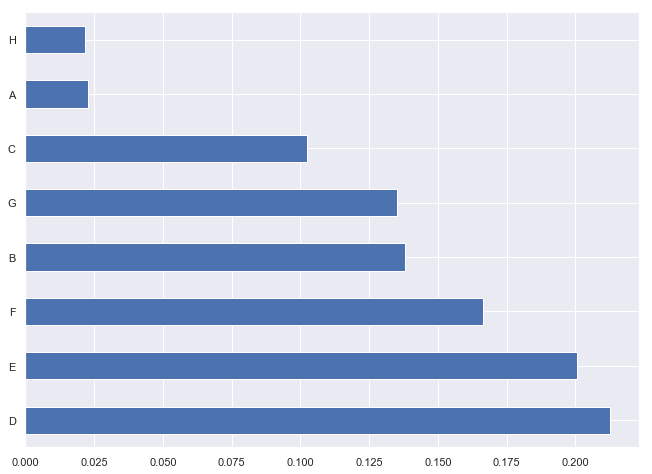

In [463]:
df['area_group_mean_fee'].value_counts(normalize=True).plot(kind='barh')

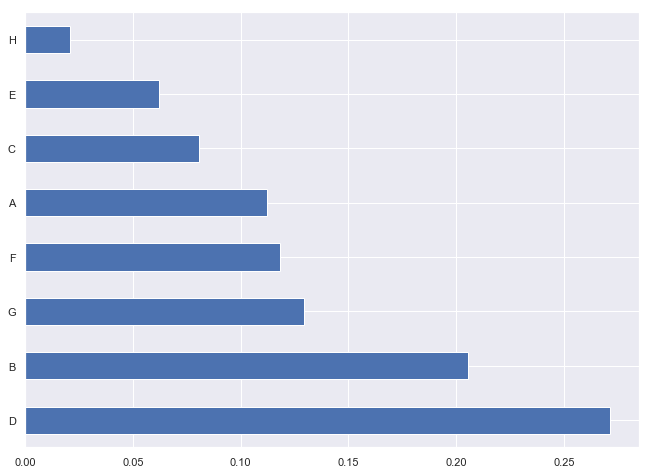

In [464]:
df['area_group_median_fee'].value_counts(normalize=True).plot(kind='barh')

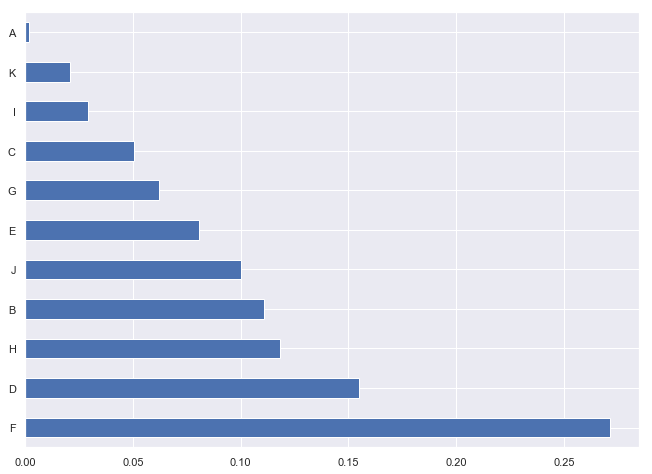

In [465]:
df['area_group_median_fee1'].value_counts(normalize=True).plot(kind='barh')

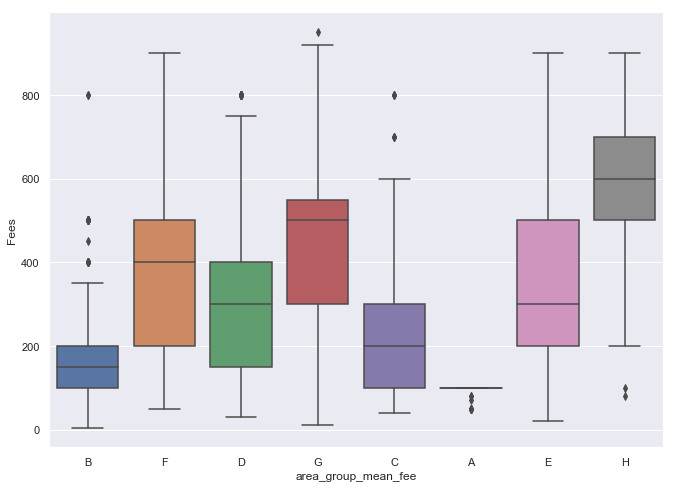

In [466]:
sns.boxplot(x="area_group_mean_fee", y="Fees", data=df[df.train_flag==1])

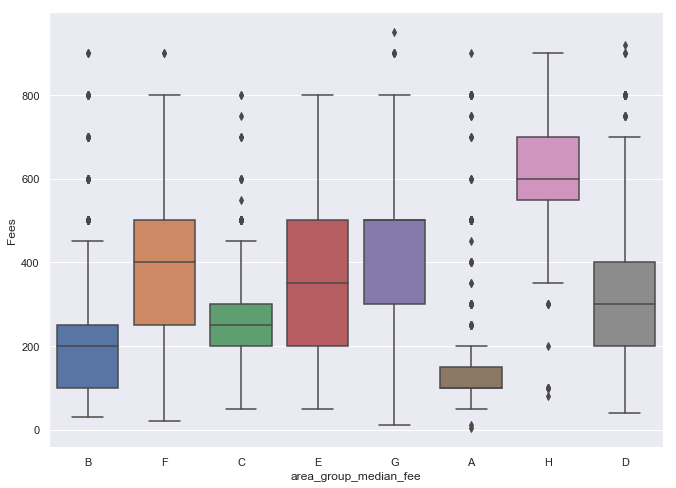

In [467]:
sns.boxplot(x="area_group_median_fee", y="Fees", data=df[df.train_flag==1])

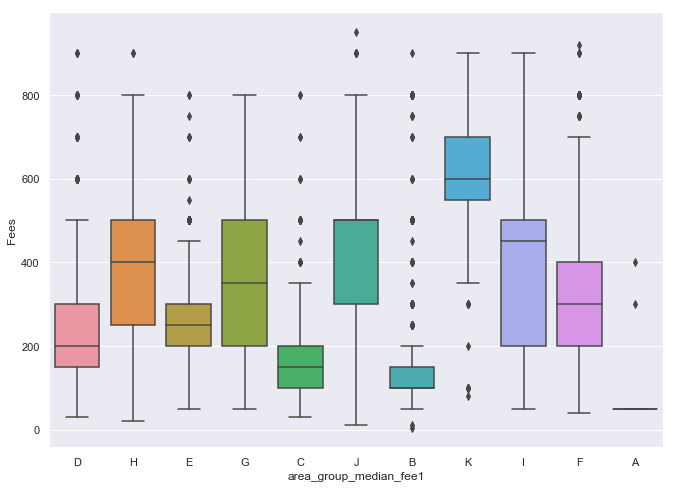

In [468]:
sns.boxplot(x="area_group_median_fee1", y="Fees", data=df[df.train_flag==1])

In [469]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 7947
Data columns (total 52 columns):
Qualification                7948 non-null object
Experience                   7948 non-null object
Rating                       3556 non-null object
Place                        7917 non-null object
Profile                      7948 non-null object
Miscellaneous_Info           4494 non-null object
Fees                         5961 non-null float64
train_flag                   7948 non-null int32
ayurveda_bams                7948 non-null int32
ayurveda_ms                  7948 non-null int32
ayurveda_md                  7948 non-null int32
dentist_bds                  7948 non-null int32
dentist_mds                  7948 non-null int32
dentist_orthodontics         7948 non-null int32
dentist_periodontics         7948 non-null int32
dentist_prosthodontics       7948 non-null int32
dentist_oralandmaxi          7948 non-null int32
dentist_cosmetic             7948 non-null int32
der

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place         Profile  \
0  Kakkanad, Ernakulam           Homeopath        
1  Whitefield, Bangalore         Ayurveda         
2  Mathikere - BEL, Bangalore    ENT Specialist   
3  Bannerghatta Road, Bangalore  Ayurveda         
4  Keelkattalai, Chennai         Ayurveda         

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  ayurveda_bams  ayurveda_ms  ...  rating_number  \
0  1           0              0            ...  100.0           
1  1           1              0            ...  98.0            
2  1           0              0            ... NaN              
3  1           1              0            ... NaN              
4  1           1              0            ...  100.0           

   rating_mean_imputed  rating_median_imputed  rating_mean_imputed_log  \
0  100.00000            100.0                  4.605170                  
1  98.00000             98.0                   4.584967                  
2  94.59252             97.0                   4.549578                  
3  94.59252             97.0                   4.549578                  
4  100.00000            100.0                  4.605170                  

   rating_median_imputed_log               area       city  \
0  4.605170                   Kakkanad           Ernakulam   
1  4.584967                   Whitefield         Bangalore   
2  4.574711                   Mathikere - BEL    Bangalore   
3  4.574711                   Bannerghatta Road  Bangalore   
4  4.605170                   Keelkattalai       Chennai     

   area_group_mean_fee  area_group_median_fee  area_group_median_fee1  
0  B                    B                      D                       
1  F                    F                      H                       
2  D                    C                      E                       
3  G                    E                      G                       
4  B                    B                      C                       

[5 rows x 52 columns]

## 3. Variable Selection & Sketching Models

In [470]:
df = pd.get_dummies(data=df, columns=['Profile', 'city', 'area_group_mean_fee', 'area_group_median_fee', 'area_group_median_fee1'])
df.head()

Qualification           Experience Rating  \
0  BHMS, MD - Homeopathy           24 years experience  100%    
1  BAMS, MD - Ayurveda Medicine    12 years experience  98%     
2  MBBS, MS - Otorhinolaryngology  9 years experience   NaN     
3  BSc - Zoology, BAMS             12 years experience  NaN     
4  BAMS                            20 years experience  100%    

                          Place  \
0  Kakkanad, Ernakulam            
1  Whitefield, Bangalore          
2  Mathikere - BEL, Bangalore     
3  Bannerghatta Road, Bangalore   
4  Keelkattalai, Chennai          

                                           Miscellaneous_Info   Fees  \
0  100% 16 Feedback Kakkanad, Ernakulam                        100.0   
1  98% 76 Feedback Whitefield, Bangalore                       350.0   
2  NaN                                                         300.0   
3  Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb  250.0   
4  100% 4 Feedback Keelkattalai, Chennai                       250.0   

   train_flag  ayurveda_bams  ayurveda_ms  ayurveda_md  ...  \
0  1           0              0            0            ...   
1  1           1              0            1            ...   
2  1           0              0            0            ...   
3  1           1              0            0            ...   
4  1           1              0            0            ...   

   area_group_median_fee1_B  area_group_median_fee1_C  \
0  0                         0                          
1  0                         0                          
2  0                         0                          
3  0                         0                          
4  0                         1                          

   area_group_median_fee1_D  area_group_median_fee1_E  \
0  1                         0                          
1  0                         0                          
2  0                         1                          
3  0                         0                          
4  0                         0                          

   area_group_median_fee1_F  area_group_median_fee1_G  \
0  0                         0                          
1  0                         0                          
2  0                         0                          
3  0                         1                          
4  0                         0                          

   area_group_median_fee1_H  area_group_median_fee1_I  \
0  0                         0                          
1  1                         0                          
2  0                         0                          
3  0                         0                          
4  0                         0                          

   area_group_median_fee1_J  area_group_median_fee1_K  
0  0                         0                         
1  0                         0                         
2  0                         0                         
3  0                         0                         
4  0                         0                         

[5 rows x 88 columns]

In [389]:
#df.info()
#df.to_csv("df_for_r.csv", sep=',')

In [471]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor 


In [197]:
features = ['Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
            'Profile_General Medicine', 'Profile_Homeopath', 'exp_years', 
            'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
            'city_Delhi', 'city_Ernakulam', 'city_Hyderabad','city_Thiruvananthapuram', 
            'fee_group_A','fee_group_B','fee_group_C', 'fee_group_D','fee_group_E', 'fee_group_F', 'fee_group_G','fee_group_H',
           'ayurveda_bams','ayurveda_ms','ayurveda_md', 'dentist_bds', 'dentist_mds',
           'dentist_orthodontics', 'dentist_periodontics', 'dentist_prosthodontics', 'dentist_oralandmaxi', 'dentist_cosmetic',
           'dermatology_md','dermatology_venereology','dermatology_leprosy','dermatology_dnb','dermatology_cosmetic',
           'ent_ms','ent_otorhinolaryngology','ent_oncology',
           'homeopath_bhms','homeopath_dhms','homeopath_md',
           'gm_md','gm_cardio','gm_surgery','gm_diabet','gm_child','gm_chest','gm_obstet','gm_pulmonary',
           'gm_endocrin','gm_rheum']

X_train, X_test, y_train, y_test = train_test_split(df[features][df.train_flag==1], df['Fees'][df.train_flag==1], 
                                                    test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4768, 53)
(1193, 53)
(4768,)
(1193,)


In [198]:
### Linear Model ###
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
#model.score(X_test, y_test)
#model.coef_
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
LinearReg RMSLE on Training set : 0.59145025652584
LinearReg RMSLE on Test set : 0.5970745109286446

=========RMSLE with Rounded (50) Predictions==========
LinearReg RMSLE on Training set : 0.5977128539164029
LinearReg RMSLE on Test set : 0.6003364517230855

=========RMSLE with Rounded (100) Predictions==========
LinearReg RMSLE on Training set : 0.6625078345502956
LinearReg RMSLE on Test set : 0.6241154234350677

=========R^2 with Actual Predictions==========
LinearReg R^2 on Training set : 0.3369424085720558
LinearReg R^2 on Test set : 0.34036469639995526

=========R^2 with Rounded (50) Predictions==========
LinearReg R^2 on Training set : 0.3307929062105799
LinearReg R^2 on Test set : 0.33970203448991243

=========R^2 with Rounded (100) Predictions==========
LinearReg R^2 on Training set : 0.3166390519757073
LinearReg R^2 on Test set : 0.30775161212135205


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


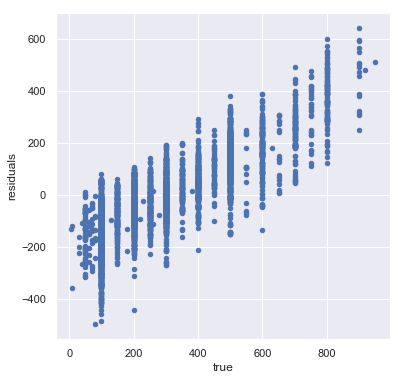

In [245]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":lin_model.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "true", y = "residuals",kind = "scatter")

In [199]:
lin_model1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(lin_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fees   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     46.99
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -30817.
No. Observations:                4768   AIC:                         6.174e+04
Df Residuals:                    4716   BIC:                         6.207e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(np.round(lin_model.predict(X_test_final)/100) * 100, columns = ['Fees']).to_excel("submit_6_linmodel_allvar_round100.xlsx", index = False)

In [203]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(lin_model.predict(X_test_final), columns = ['Fees']).to_excel("submit_9_linmodel_allvar1.xlsx", index = False)

In [204]:
### Ridge Model ###
#RobustScaler() to make the model robust against outliers
ridge = make_pipeline(RobustScaler(),RidgeCV(alphas = [1e-15,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1, 
                                                       0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                                                       0.3, 0.6, 1, 3, 6, 10, 30, 60, 100], normalize=True))
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
LinearReg RMSLE on Training set : 0.5905270367751603
LinearReg RMSLE on Test set : 0.5964207720532562

=========RMSLE with Rounded (50) Predictions==========
LinearReg RMSLE on Training set : 0.59267284428999
LinearReg RMSLE on Test set : 0.5995852291512899

=========RMSLE with Rounded (100) Predictions==========
LinearReg RMSLE on Training set : 0.6191233080906572
LinearReg RMSLE on Test set : 0.6260910532302733

=========R^2 with Actual Predictions==========
LinearReg R^2 on Training set : 0.3363901515158766
LinearReg R^2 on Test set : 0.33928822044430496

=========R^2 with Rounded (50) Predictions==========
LinearReg R^2 on Training set : 0.33146304788047587
LinearReg R^2 on Test set : 0.3349547908826689

=========R^2 with Rounded (100) Predictions==========
LinearReg R^2 on Training set : 0.31539120196969406
LinearReg R^2 on Test set : 0.30503242723892143


In [205]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(np.round(ridge.predict(X_test_final)/50) * 50, columns = ['Fees']).to_excel("submit_3_ridge_allvar.xlsx", index = False)

In [206]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(ridge.predict(X_test_final), columns = ['Fees']).to_excel("submit_10_ridge_allvar1.xlsx", index = False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


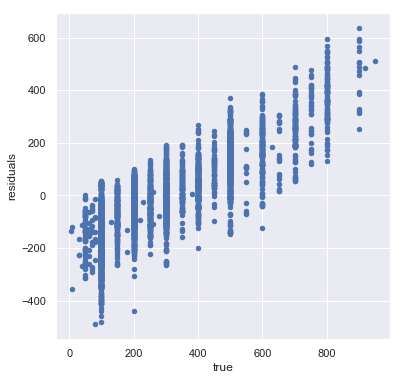

In [246]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":ridge.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "true", y = "residuals",kind = "scatter")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


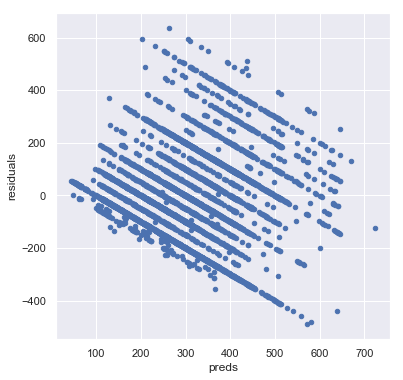

In [247]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":ridge.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [ ]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))

In [210]:
### Lasso ###
lasso = make_pipeline(RobustScaler(),LassoCV(alphas = [1e-5,1e-4,
                                                       0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                                                       0.3, 0.6, 1, 3, 6, 10, 30, 60, 100], 
                max_iter = 50000, cv = 10, normalize = True))
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("LinearReg R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
LinearReg RMSLE on Training set : 0.5902908903407276
LinearReg RMSLE on Test set : 0.5963051934287075

=========RMSLE with Rounded (50) Predictions==========
LinearReg RMSLE on Training set : 0.5932719269727027
LinearReg RMSLE on Test set : 0.5994722019390148

=========RMSLE with Rounded (100) Predictions==========
LinearReg RMSLE on Training set : 0.6015818166878212
LinearReg RMSLE on Test set : 0.6105444122256902

=========R^2 with Actual Predictions==========
LinearReg R^2 on Training set : 0.3361039370153778
LinearReg R^2 on Test set : 0.34036446441650625

=========R^2 with Rounded (50) Predictions==========
LinearReg R^2 on Training set : 0.3317172395483675
LinearReg R^2 on Test set : 0.3359744852135804

=========R^2 with Rounded (100) Predictions==========
LinearReg R^2 on Training set : 0.31739007281265974
LinearReg R^2 on Test set : 0.30797821086155464


In [ ]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(np.round(lasso.predict(X_test_final)/50) * 50, columns = ['Fees']).to_excel("submit_4_lasso_allvar.xlsx", index = False)

In [89]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(np.round(lasso.predict(X_test_final)/100) * 100, columns = ['Fees']).to_excel("submit_5_lasso_allvar_round100.xlsx", index = False)

In [99]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(lasso.predict(X_test_final), columns = ['Fees']).to_excel("submit_7_lasso_allvar_noround.xlsx", index = False)

In [211]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(lasso.predict(X_test_final), columns = ['Fees']).to_excel("submit_11_lasso_allvar1.xlsx", index = False)

In [208]:
np.logspace(-5, 2, 30)

array([1.00000000e-05, 1.74332882e-05, 3.03919538e-05, 5.29831691e-05,
       9.23670857e-05, 1.61026203e-04, 2.80721620e-04, 4.89390092e-04,
       8.53167852e-04, 1.48735211e-03, 2.59294380e-03, 4.52035366e-03,
       7.88046282e-03, 1.37382380e-02, 2.39502662e-02, 4.17531894e-02,
       7.27895384e-02, 1.26896100e-01, 2.21221629e-01, 3.85662042e-01,
       6.72335754e-01, 1.17210230e+00, 2.04335972e+00, 3.56224789e+00,
       6.21016942e+00, 1.08263673e+01, 1.88739182e+01, 3.29034456e+01,
       5.73615251e+01, 1.00000000e+02])

In [209]:
lasso = Lasso(alpha=0.002, max_iter = 50000).fit(X_train, y_train)
lasso_grid = {"alpha" : np.logspace(-5, 2, 30)}

grid_search = GridSearchCV(lasso, lasso_grid, cv=10, scoring="neg_mean_squared_log_error")
grid_search.fit(X_train, y_train)
print ("best lasso alpha: ", grid_search.best_params_)


C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\si

best lasso alpha:  {'alpha': 0.22122162910704501}


In [152]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("LinearReg R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
LinearReg RMSLE on Training set : 0.5941273600828747
LinearReg RMSLE on Test set : 0.5981774864537762

=========RMSLE with Rounded (50) Predictions==========
LinearReg RMSLE on Training set : 0.6014781966192507
LinearReg RMSLE on Test set : 0.6065642001980001

=========RMSLE with Rounded (100) Predictions==========
LinearReg RMSLE on Training set : 0.6009119351805395
LinearReg RMSLE on Test set : 0.606459339329681

=========R^2 with Actual Predictions==========
LinearReg R^2 on Training set : 0.32306927070799574
LinearReg R^2 on Test set : 0.33263094031322127

=========R^2 with Rounded (50) Predictions==========
LinearReg R^2 on Training set : 0.31044081923750544
LinearReg R^2 on Test set : 0.3200332638403306

=========R^2 with Rounded (100) Predictions==========
LinearReg R^2 on Training set : 0.30567414775620194
LinearReg R^2 on Test set : 0.3142096762171249


In [212]:
#Building a lasso with the best alpha

lasso = Lasso(alpha=0.22122162910704501, max_iter = 50000).fit(X_train, y_train)

feature_coefs = pd.DataFrame()
feature_coefs['feature'] = pd.Series(features)
feature_coefs['lasso.coef_'] = pd.Series(lasso.coef_)
print(feature_coefs)
# 21 out of 53 features got eliminated

                     feature  lasso.coef_
0   Profile_Ayurveda         -50.017397  
1   Profile_Dentist          -52.610003  
2   Profile_Dermatologists    64.342002  
3   Profile_ENT Specialist    74.246156  
4   Profile_General Medicine -0.000000   
5   Profile_Homeopath         0.000000   
6   exp_years                -0.617040   
7   city_Bangalore            0.000000   
8   city_Chennai             -0.000000   
9   city_Coimbatore          -3.763996   
10  city_Delhi                4.677620   
11  city_Ernakulam            0.000000   
12  city_Hyderabad            0.000000   
13  city_Thiruvananthapuram   0.000000   
14  fee_group_A              -193.095185 
15  fee_group_B              -134.656424 
16  fee_group_C              -91.268768  
17  fee_group_D              -40.472911  
18  fee_group_E               0.000000   
19  fee_group_F               38.476762  
20  fee_group_G               106.303481 
21  fee_group_H               232.895537 
22  ayurveda_bams            -0.00

In [213]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("LinearReg R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
LinearReg RMSLE on Training set : 0.591380199451918
LinearReg RMSLE on Test set : 0.5931457296072469

=========RMSLE with Rounded (50) Predictions==========
LinearReg RMSLE on Training set : 0.5940651176926582
LinearReg RMSLE on Test set : 0.5949932074747112

=========RMSLE with Rounded (100) Predictions==========
LinearReg RMSLE on Training set : 0.5990166547047452
LinearReg RMSLE on Test set : 0.6101700662953445

=========R^2 with Actual Predictions==========
LinearReg R^2 on Training set : 0.331762998439197
LinearReg R^2 on Test set : 0.3483361243991753

=========R^2 with Rounded (50) Predictions==========
LinearReg R^2 on Training set : 0.32922442807802155
LinearReg R^2 on Test set : 0.34984232811397675

=========R^2 with Rounded (100) Predictions==========
LinearReg R^2 on Training set : 0.3143282186312384
LinearReg R^2 on Test set : 0.31078803524006626


In [155]:
#np.linspace(0,0.4,40)

array([0.        , 0.01025641, 0.02051282, 0.03076923, 0.04102564,
       0.05128205, 0.06153846, 0.07179487, 0.08205128, 0.09230769,
       0.1025641 , 0.11282051, 0.12307692, 0.13333333, 0.14358974,
       0.15384615, 0.16410256, 0.17435897, 0.18461538, 0.19487179,
       0.20512821, 0.21538462, 0.22564103, 0.23589744, 0.24615385,
       0.25641026, 0.26666667, 0.27692308, 0.28717949, 0.2974359 ,
       0.30769231, 0.31794872, 0.32820513, 0.33846154, 0.34871795,
       0.35897436, 0.36923077, 0.37948718, 0.38974359, 0.4       ])

In [214]:
# Refining the search around 0.22
lasso = Lasso(alpha=0.22, max_iter = 50000).fit(X_train, y_train)
lasso_grid = {"alpha" : np.linspace(0,0.4,40)}

grid_search = GridSearchCV(lasso, lasso_grid, cv=10, scoring="neg_mean_squared_log_error")
grid_search.fit(X_train, y_train)
print ("best lasso alpha: ", grid_search.best_params_)

C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\murali.krishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algori

best lasso alpha:  {'alpha': 0.22564102564102564}


In [215]:
#Building a lasso with the best alpha

lasso = Lasso(alpha=0.22564102564102564, max_iter = 50000).fit(X_train, y_train)

feature_coefs = pd.DataFrame()
feature_coefs['feature'] = pd.Series(features)
feature_coefs['lasso.coef_'] = pd.Series(lasso.coef_)
print(feature_coefs)
# 23 out of 53 features got eliminated

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("LinearReg RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("LinearReg RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("LinearReg R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("LinearReg R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("LinearReg R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))

                     feature  lasso.coef_
0   Profile_Ayurveda         -50.053551  
1   Profile_Dentist          -52.703045  
2   Profile_Dermatologists    64.215510  
3   Profile_ENT Specialist    73.894558  
4   Profile_General Medicine -0.000000   
5   Profile_Homeopath         0.000000   
6   exp_years                -0.617411   
7   city_Bangalore            0.000000   
8   city_Chennai             -0.000000   
9   city_Coimbatore          -3.673813   
10  city_Delhi                4.677047   
11  city_Ernakulam            0.000000   
12  city_Hyderabad            0.000000   
13  city_Thiruvananthapuram   0.000000   
14  fee_group_A              -192.933617 
15  fee_group_B              -134.648590 
16  fee_group_C              -91.213010  
17  fee_group_D              -40.435808  
18  fee_group_E               0.000000   
19  fee_group_F               38.472179  
20  fee_group_G               106.306870 
21  fee_group_H               232.744619 
22  ayurveda_bams            -0.00

In [159]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(lasso.predict(X_test_final), columns = ['Fees']).to_excel("submit_8_lasso_best_alpha.xlsx", index = False)

In [216]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(lasso.predict(X_test_final), columns = ['Fees']).to_excel("submit_12_lasso_best_alpha1.xlsx", index = False)

In [219]:
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10, random_state=0)

dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.614863587241235
RMSLE on Test set : 0.612111212432031

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.6192571582251774
RMSLE on Test set : 0.6183994805995193

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.6268588267943609
RMSLE on Test set : 0.6258402831103284

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.264917269621487
R^2 on Test set : 0.3014470626550385

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.2615395417101888
R^2 on Test set : 0.29516405210310015

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.2479206453945607
R^2 on Test set : 0.27299136537428004


In [220]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 50, 100],
              "max_depth": [2, 4, 6, 8, 10],
              "min_samples_leaf": [5, 20, 50, 100],
              "max_leaf_nodes": [5, 20, 50, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 50, 100], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [5, 20, 50, 100], 'max_leaf_nodes': [5, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [221]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

y_train_pred = grid_cv_dtm.predict(X_train)
y_test_pred = grid_cv_dtm.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( y_train, np.round(y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( y_test, np.round(y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( y_train, y_train_pred ))
print("R^2 on Test set :", r2_score( y_test, y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( y_train, np.round(y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( y_test, np.round(y_test_pred/100) * 100 ))

R-Squared::0.3063128408628776
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 20, 'min_samples_split': 100}

=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5758415111042899
RMSLE on Test set : 0.5813548722738999

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5767107396284374
RMSLE on Test set : 0.582802969489038

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5830443219757371
RMSLE on Test set : 0.5895397919185195

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.36217895157662605
R^2 on Test set : 0.359605818890796

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.35780077092406126
R^2 on Test set : 0.35068074345272626

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.3398975895877877
R^2 on Test set : 0.34570690110528013


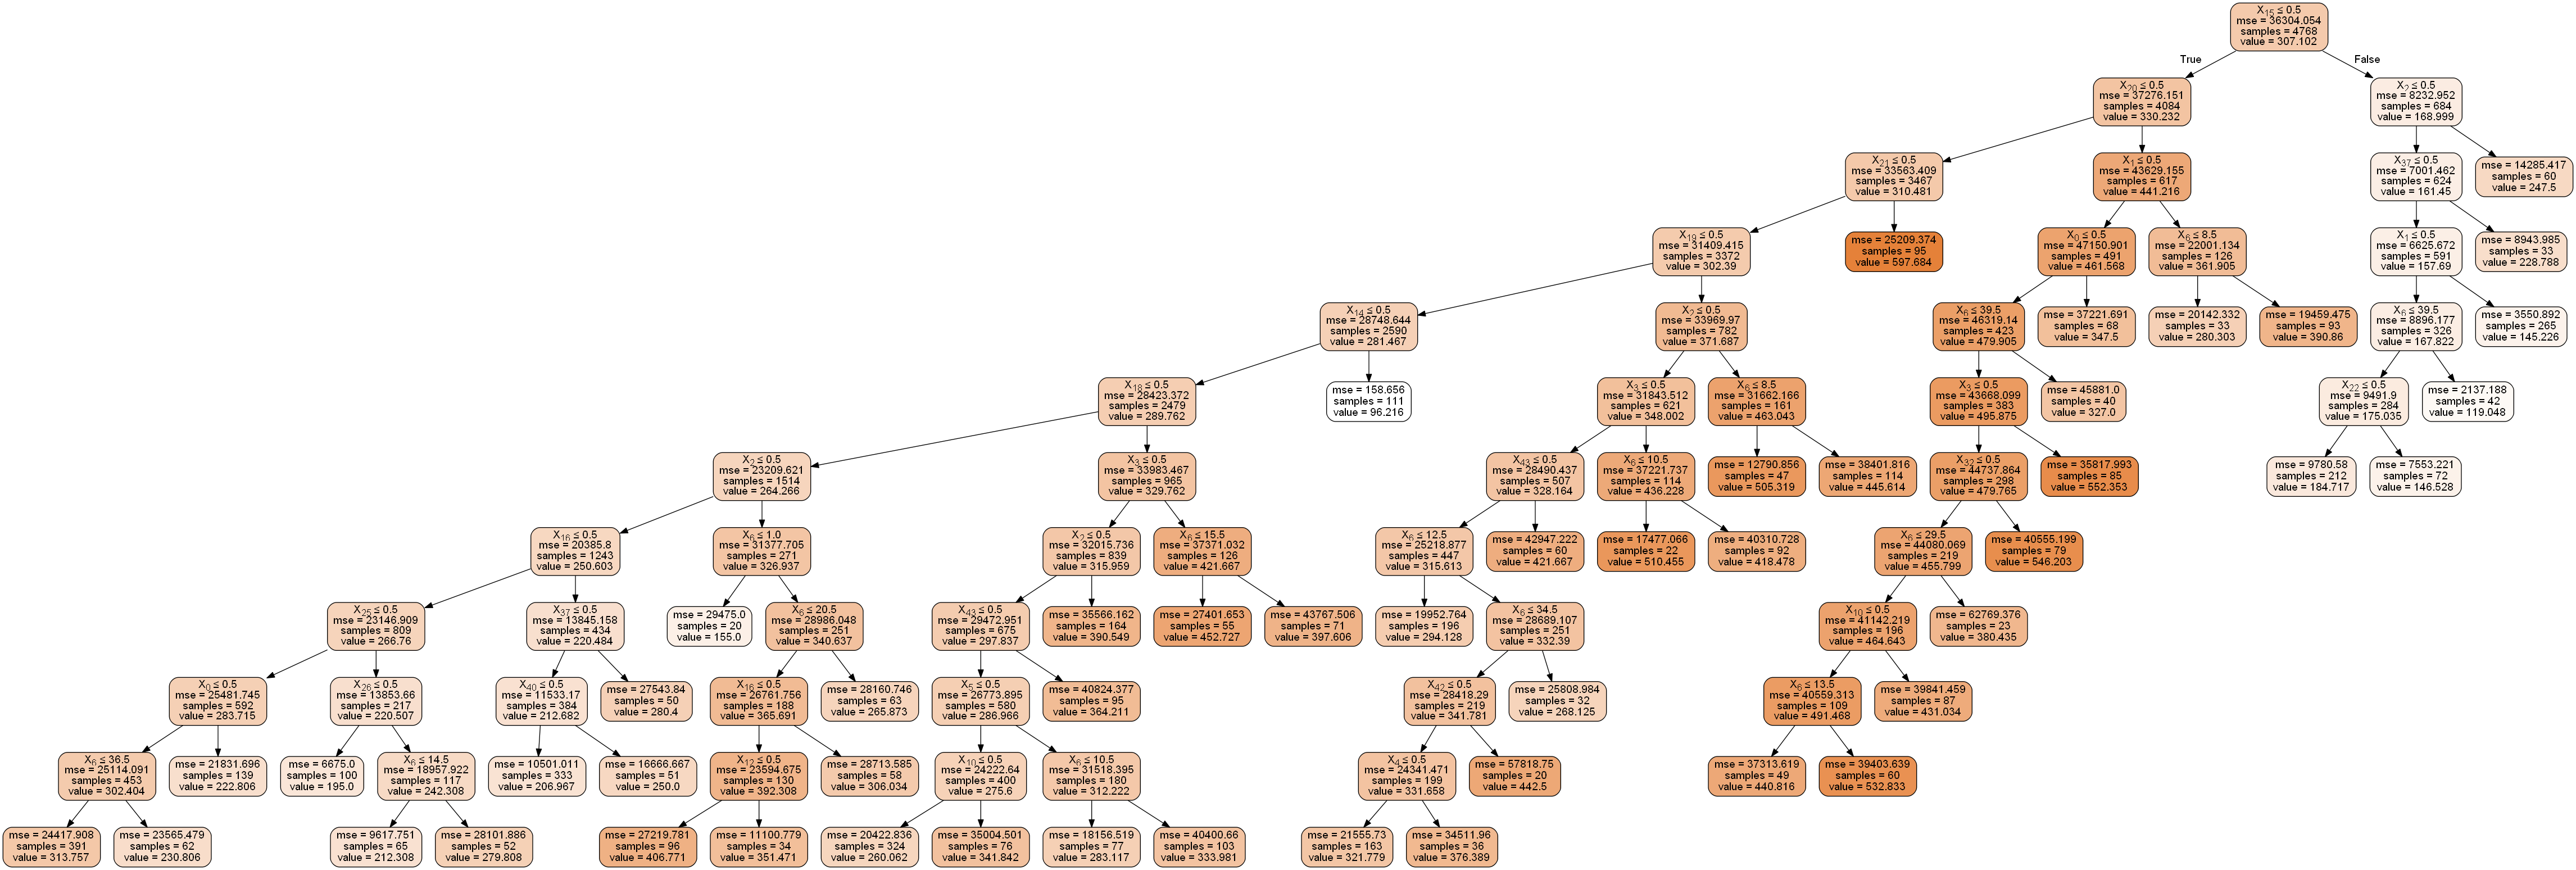

In [235]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dtm = DecisionTreeRegressor(criterion= 'mse', max_depth= 10, max_leaf_nodes= 50, min_samples_leaf= 20, 
                            min_samples_split= 100, random_state=0)
dtm.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtm, out_file=dot_data,  
                filled = True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [233]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(grid_cv_dtm.predict(X_test_final), columns = ['Fees']).to_excel("submit_13_dtm_best_param.xlsx", index = False)

In [236]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(dtm.predict(X_test_final), columns = ['Fees']).to_excel("submit_14_dtm_best_param1.xlsx", index = False)

In [239]:
dtm.tree_
#print(dtm.feature_importances_)

#### Rough

In [74]:
def logRMSE(y_test, y_pred): 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [116]:
print("LinearReg RMSLE on Training set :", logRMSE(y_train, y_train_pred))
print("LinearReg RMSLE on Test set :", logRMSE(y_test, y_test_pred))

LinearReg RMSLE on Training set : 0.5938535477230887
LinearReg RMSLE on Test set : 0.6021406708082573


In [321]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

## Predicting Log of Fees

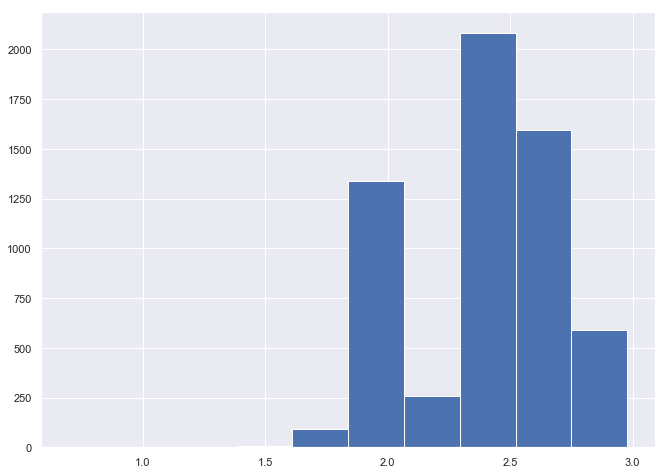

In [472]:
#x <- pd.DataFrame(fees = df.Fees[df.train_flag==1], log_fees = np.log(df.Fees[df.train_flag==1]))
#type(x)
#x.fees = df.Fees[df.train_flag==1]
log_fees = np.log10(df.Fees[df.train_flag==1])
log_fees.hist()

In [473]:
df1 = df.copy()
df1['log_fees'] = np.log10(df.Fees)
df1[df1.train_flag==0].head()

Qualification           Experience  \
5961  MBBS                                             35 years experience   
5962  MBBS, Diploma in Otorhinolaryngology (DLO)       31 years experience   
5963  MBBS, DDVL                                       40 years experience   
5964  BAMS                                             0 years experience    
5965  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

     Rating                        Place  \
5961  NaN    Ghatkopar East, Mumbai        
5962  NaN    West Marredpally, Hyderabad   
5963  70%    KK Nagar, Chennai             
5964  NaN    New Ashok Nagar, Delhi        
5965  100%   Kanakpura Road, Bangalore     

                                                          Miscellaneous_Info  \
5961  NaN                                                                      
5962  NaN                                                                      
5963  70% 4 Feedback KK Nagar, Chennai                                         
5964  NaN                                                                      
5965  General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry   

      Fees  train_flag  ayurveda_bams  ayurveda_ms  ayurveda_md  ...  \
5961 NaN    0           0              0            0            ...   
5962 NaN    0           0              0            0            ...   
5963 NaN    0           0              0            0            ...   
5964 NaN    0           1              0            0            ...   
5965 NaN    0           0              0            0            ...   

      area_group_median_fee1_C  area_group_median_fee1_D  \
5961  0                         0                          
5962  0                         0                          
5963  0                         1                          
5964  0                         0                          
5965  0                         0                          

      area_group_median_fee1_E  area_group_median_fee1_F  \
5961  0                         1                          
5962  0                         0                          
5963  0                         0                          
5964  0                         1                          
5965  0                         0                          

      area_group_median_fee1_G  area_group_median_fee1_H  \
5961  0                         0                          
5962  0                         1                          
5963  0                         0                          
5964  0                         0                          
5965  1                         0                          

      area_group_median_fee1_I  area_group_median_fee1_J  \
5961  0                         0                          
5962  0                         0                          
5963  0                         0                          
5964  0                         0                          
5965  0                         0                          

      area_group_median_fee1_K  log_fees  
5961  0                        NaN        
5962  0                        NaN        
5963  0                        NaN        
5964  0                        NaN        
5965  0                        NaN        

[5 rows x 89 columns]

In [478]:
features = ['Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
            'Profile_General Medicine', 'Profile_Homeopath', 'exp_years', 
            'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
            'city_Delhi', 'city_Ernakulam', 'city_Hyderabad','city_Thiruvananthapuram', 
            'area_group_median_fee_A','area_group_median_fee_B','area_group_median_fee_C','area_group_median_fee_D',
            'area_group_median_fee_E','area_group_median_fee_F','area_group_median_fee_G','area_group_median_fee_H',
           'ayurveda_bams','ayurveda_ms','ayurveda_md', 'dentist_bds', 'dentist_mds',
           'dentist_orthodontics', 'dentist_periodontics', 'dentist_prosthodontics', 'dentist_oralandmaxi', 'dentist_cosmetic',
           'dermatology_md','dermatology_venereology','dermatology_leprosy','dermatology_dnb','dermatology_cosmetic',
           'ent_ms','ent_otorhinolaryngology','ent_oncology',
           'homeopath_bhms','homeopath_dhms','homeopath_md',
           'gm_md','gm_cardio','gm_surgery','gm_diabet','gm_child','gm_chest','gm_obstet','gm_pulmonary',
           'gm_endocrin','gm_rheum',
           'rating_median_imputed_log']

X_train, X_test, y_train, y_test = train_test_split(df1[features][df1.train_flag==1], df1['log_fees'][df1.train_flag==1], 
                                                    test_size=0.1, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5364, 54)
(597, 54)
(5364,)
(597,)


In [479]:
### Linear Model ###
lin_log_model = LinearRegression()
lin_log_model.fit(X_train, y_train)
#model.score(X_test, y_test)
#model.coef_
y_train_pred = lin_log_model.predict(X_train)
y_test_pred = lin_log_model.predict(X_test)


print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5659579965932183
RMSLE on Test set : 0.5731578633055409

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5692010048191641
RMSLE on Test set : 0.577496517686398

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5816120786496018
RMSLE on Test set : 0.5997674824534739

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.25840299018933033
R^2 on Test set : 0.2374495580965017

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.2543826840996475
R^2 on Test set : 0.23213994896983603

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.24207522829661332
R^2 on Test set : 0.20989127111792993


In [285]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**lin_log_model.predict(X_test_final), columns = ['Fees']).to_excel("submit_15_lin_log_model.xlsx", index = False)

In [480]:
### Ridge Model ###
#RobustScaler() to make the model robust against outliers
ridge_log = make_pipeline(RobustScaler(),RidgeCV(alphas = [1e-15,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1, 
                                                       0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                                                       0.3, 0.6, 1, 3, 6, 10, 30, 60, 100], normalize=True))
ridge_log.fit(X_train, y_train)

y_train_pred = ridge_log.predict(X_train)
y_test_pred = ridge_log.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5661570963018543
RMSLE on Test set : 0.573447783951444

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5696902483400587
RMSLE on Test set : 0.5783355167910454

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5824859294034799
RMSLE on Test set : 0.5976943199606397

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.2550397974413702
R^2 on Test set : 0.23456840647612176

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.24952117502281945
R^2 on Test set : 0.22645846841521233

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.23568201088051077
R^2 on Test set : 0.2117093448954095


In [289]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_16_ridge_log_model.xlsx", index = False)

In [172]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_20_ridge_log_model_rating_avg.xlsx", index = False)

In [176]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_21_ridge_log_model_rating_median.xlsx", index = False)

In [180]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_22_ridge_log_model_rating_median_area_median.xlsx", index = False)

In [393]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_23_ridge_log_model_rating_median_area_median1.xlsx", index = False)

In [477]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**ridge_log.predict(X_test_final), columns = ['Fees']).to_excel("submit_24_ridge_log_model_rating_median_area_median1_exp_log.xlsx", index = False)

In [481]:
np.logspace(-5, 2, 30)

array([1.00000000e-05, 1.74332882e-05, 3.03919538e-05, 5.29831691e-05,
       9.23670857e-05, 1.61026203e-04, 2.80721620e-04, 4.89390092e-04,
       8.53167852e-04, 1.48735211e-03, 2.59294380e-03, 4.52035366e-03,
       7.88046282e-03, 1.37382380e-02, 2.39502662e-02, 4.17531894e-02,
       7.27895384e-02, 1.26896100e-01, 2.21221629e-01, 3.85662042e-01,
       6.72335754e-01, 1.17210230e+00, 2.04335972e+00, 3.56224789e+00,
       6.21016942e+00, 1.08263673e+01, 1.88739182e+01, 3.29034456e+01,
       5.73615251e+01, 1.00000000e+02])

In [485]:
ridge_log = Ridge(alpha=0.002, max_iter=50000, normalize=True).fit(X_train, y_train)
ridge_log_grid = {"alpha" : np.logspace(-5, 2, 30)}

grid_search = GridSearchCV(ridge_log, ridge_log_grid, cv=10, scoring="neg_mean_squared_log_error") #neg_mean_squared_error
grid_search.fit(X_train, y_train)
print ("best lasso alpha: ", grid_search.best_params_)

best lasso alpha:  {'alpha': 0.02395026619987486}


In [486]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5661057165633525
RMSLE on Test set : 0.5733838109896648

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5693393293131046
RMSLE on Test set : 0.5782545318502504

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5816260230985095
RMSLE on Test set : 0.5976943199606397

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.25568935638095847
R^2 on Test set : 0.23516241018176076

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.25072502605870417
R^2 on Test set : 0.22657209802630485

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.23843806133713186
R^2 on Test set : 0.2117093448954095


In [487]:
X_test_final = df1[features][df1.train_flag==0].values
pd.DataFrame(10**grid_search.predict(X_test_final), columns = ['Fees']).to_excel("submit_25_ridge_log_111.xlsx", index = False)

In [299]:
np.logspace(-5, 2, 30)

array([1.00000000e-05, 1.74332882e-05, 3.03919538e-05, 5.29831691e-05,
       9.23670857e-05, 1.61026203e-04, 2.80721620e-04, 4.89390092e-04,
       8.53167852e-04, 1.48735211e-03, 2.59294380e-03, 4.52035366e-03,
       7.88046282e-03, 1.37382380e-02, 2.39502662e-02, 4.17531894e-02,
       7.27895384e-02, 1.26896100e-01, 2.21221629e-01, 3.85662042e-01,
       6.72335754e-01, 1.17210230e+00, 2.04335972e+00, 3.56224789e+00,
       6.21016942e+00, 1.08263673e+01, 1.88739182e+01, 3.29034456e+01,
       5.73615251e+01, 1.00000000e+02])

In [295]:
lasso = Lasso(alpha=0.002, max_iter = 50000).fit(X_train, y_train)
lasso_grid = {"alpha" : np.logspace(-5, 2, 30)}

grid_search = GridSearchCV(lasso, lasso_grid, cv=10, scoring="neg_mean_squared_log_error") #neg_mean_squared_error
grid_search.fit(X_train, y_train)
print ("best lasso alpha: ", grid_search.best_params_)


best lasso alpha:  {'alpha': 0.0001610262027560939}


In [297]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5621645197178521
RMSLE on Test set : 0.5638522427269136

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5672575945333214
RMSLE on Test set : 0.5651819853124861

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5776999719723399
RMSLE on Test set : 0.5856160704372307

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.272428074689679
R^2 on Test set : 0.28141450542667545

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.2650889817272931
R^2 on Test set : 0.2819533455492911

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.24713034039075232
R^2 on Test set : 0.25907820272584303


In [298]:
#Building a lasso with the best alpha

lasso = Lasso(alpha=0.0001610262027560939, max_iter = 50000).fit(X_train, y_train)

feature_coefs = pd.DataFrame()
feature_coefs['feature'] = pd.Series(features)
feature_coefs['lasso.coef_'] = pd.Series(lasso.coef_)
print(feature_coefs)
# 11 out of 53 features got eliminated

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


                     feature  lasso.coef_
0   Profile_Ayurveda         -0.099486   
1   Profile_Dentist          -0.068972   
2   Profile_Dermatologists    0.096128   
3   Profile_ENT Specialist    0.108563   
4   Profile_General Medicine  0.000000   
5   Profile_Homeopath        -0.000000   
6   exp_years                -0.001559   
7   city_Bangalore            0.068133   
8   city_Chennai              0.060421   
9   city_Coimbatore           0.015019   
10  city_Delhi                0.046361   
11  city_Ernakulam            0.039105   
12  city_Hyderabad            0.071813   
13  city_Thiruvananthapuram   0.050182   
14  fee_group_A              -0.395742   
15  fee_group_B              -0.229527   
16  fee_group_C              -0.132130   
17  fee_group_D              -0.061170   
18  fee_group_E               0.000000   
19  fee_group_F               0.055717   
20  fee_group_G               0.130727   
21  fee_group_H               0.267203   
22  ayurveda_bams             0.00

In [302]:
np.linspace(1e-5,1e-3,50)

array([1.00000000e-05, 3.02040816e-05, 5.04081633e-05, 7.06122449e-05,
       9.08163265e-05, 1.11020408e-04, 1.31224490e-04, 1.51428571e-04,
       1.71632653e-04, 1.91836735e-04, 2.12040816e-04, 2.32244898e-04,
       2.52448980e-04, 2.72653061e-04, 2.92857143e-04, 3.13061224e-04,
       3.33265306e-04, 3.53469388e-04, 3.73673469e-04, 3.93877551e-04,
       4.14081633e-04, 4.34285714e-04, 4.54489796e-04, 4.74693878e-04,
       4.94897959e-04, 5.15102041e-04, 5.35306122e-04, 5.55510204e-04,
       5.75714286e-04, 5.95918367e-04, 6.16122449e-04, 6.36326531e-04,
       6.56530612e-04, 6.76734694e-04, 6.96938776e-04, 7.17142857e-04,
       7.37346939e-04, 7.57551020e-04, 7.77755102e-04, 7.97959184e-04,
       8.18163265e-04, 8.38367347e-04, 8.58571429e-04, 8.78775510e-04,
       8.98979592e-04, 9.19183673e-04, 9.39387755e-04, 9.59591837e-04,
       9.79795918e-04, 1.00000000e-03])

In [303]:
# Refining the search around 0.22
lasso = Lasso(alpha=0.0001610262027560939, max_iter = 50000).fit(X_train, y_train)
lasso_grid = {"alpha" : np.linspace(1e-5,1e-3,50)}

grid_search = GridSearchCV(lasso, lasso_grid, cv=10, scoring="neg_mean_squared_log_error")
grid_search.fit(X_train, y_train)
print ("best lasso alpha: ", grid_search.best_params_)

best lasso alpha:  {'alpha': 0.00013122448979591839}


In [304]:
#Building a lasso with the best alpha

lasso = Lasso(alpha=0.00013122448979591839, max_iter = 50000).fit(X_train, y_train)

feature_coefs = pd.DataFrame()
feature_coefs['feature'] = pd.Series(features)
feature_coefs['lasso.coef_'] = pd.Series(lasso.coef_)
print(feature_coefs)
# 23 out of 53 features got eliminated

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


                     feature  lasso.coef_
0   Profile_Ayurveda         -0.098609   
1   Profile_Dentist          -0.068333   
2   Profile_Dermatologists    0.097427   
3   Profile_ENT Specialist    0.111310   
4   Profile_General Medicine  0.000000   
5   Profile_Homeopath        -0.000000   
6   exp_years                -0.001554   
7   city_Bangalore            0.069139   
8   city_Chennai              0.061828   
9   city_Coimbatore           0.017785   
10  city_Delhi                0.047186   
11  city_Ernakulam            0.042116   
12  city_Hyderabad            0.072824   
13  city_Thiruvananthapuram   0.054289   
14  fee_group_A              -0.397759   
15  fee_group_B              -0.230450   
16  fee_group_C              -0.132699   
17  fee_group_D              -0.061508   
18  fee_group_E               0.000000   
19  fee_group_F               0.055799   
20  fee_group_G               0.130686   
21  fee_group_H               0.267824   
22  ayurveda_bams             0.00

In [305]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(10**lasso.predict(X_test_final), columns = ['Fees']).to_excel("submit_17_lasso_log.xlsx", index = False)

In [306]:
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10, random_state=0)

dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5922145597250309
RMSLE on Test set : 0.5912763646476309

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.5949120803488239
RMSLE on Test set : 0.591647292507018

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.6163058871432128
RMSLE on Test set : 0.6130559664987187

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.17039756905760395
R^2 on Test set : 0.19354323761136405

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.15187085743170714
R^2 on Test set : 0.1786696397649662

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.1701091096029287
R^2 on Test set : 0.2101328748420911


In [307]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 50, 100],
              "max_depth": [2, 4, 6, 8, 10],
              "min_samples_leaf": [5, 20, 50, 100],
              "max_leaf_nodes": [5, 20, 50, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))


R-Squared::0.2904401269810804
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 20, 'min_samples_split': 50}


In [308]:
y_train_pred = grid_cv_dtm.predict(X_train)
y_test_pred = grid_cv_dtm.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5524205465104132
RMSLE on Test set : 0.5666905128995713

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.55583808668344
RMSLE on Test set : 0.5685075851186665

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5718982186687209
RMSLE on Test set : 0.5900986931893282

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.3077170631443029
R^2 on Test set : 0.3072442406653424

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.2995827910601817
R^2 on Test set : 0.30118024865547777

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.29848745605490346
R^2 on Test set : 0.30068173142703214


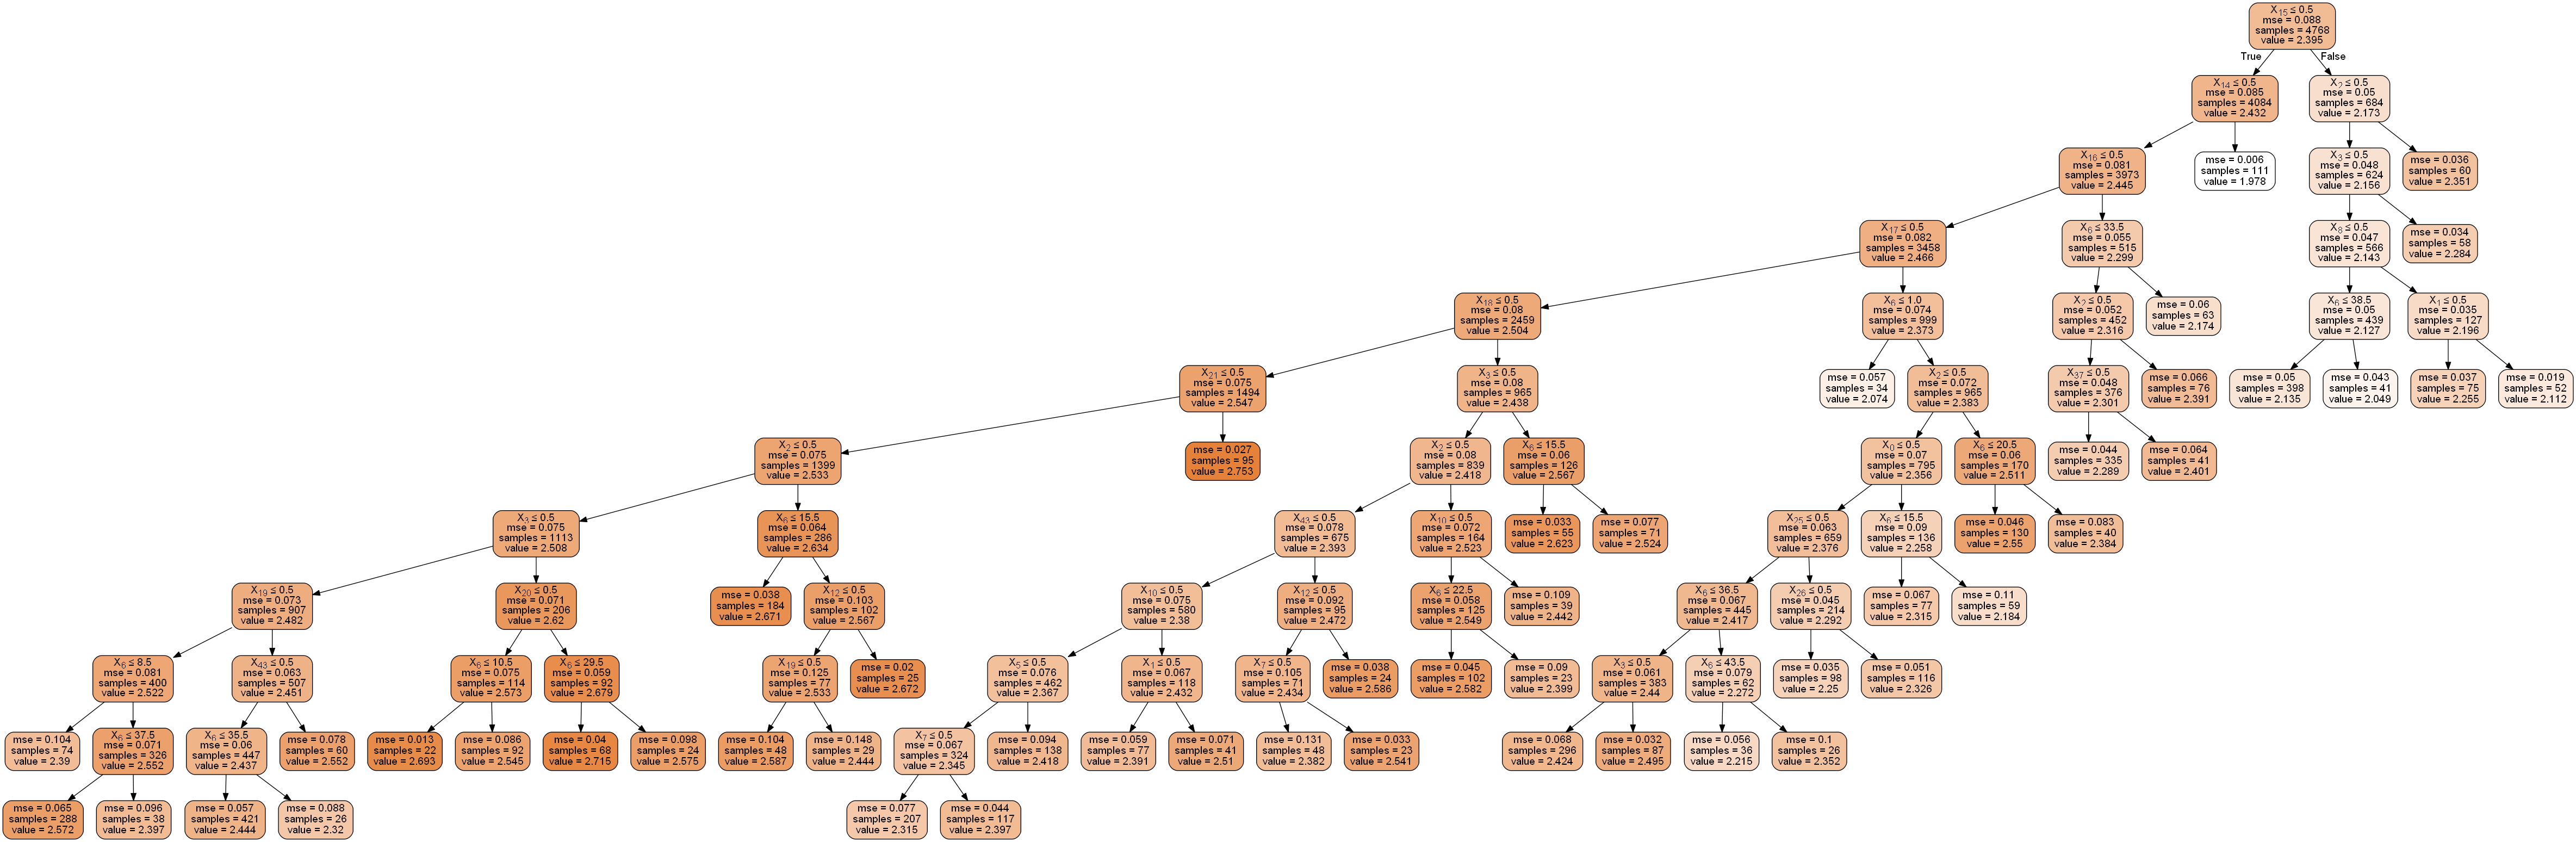

In [309]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dtm = DecisionTreeRegressor(criterion= 'mse', max_depth= 10, max_leaf_nodes= 50, min_samples_leaf= 20, 
                            min_samples_split= 50, random_state=0)
dtm.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtm, out_file=dot_data,  
                filled = True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [311]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(10**grid_cv_dtm.predict(X_test_final), columns = ['Fees']).to_excel("submit_18_dtm_best_param.xlsx", index = False)

In [313]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 1000, criterion= 'mse', max_depth= 10, max_leaf_nodes= 50, 
                                 min_samples_leaf= 20, min_samples_split= 50, random_state=0)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("\n=========RMSLE with Actual Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, 10**y_train_pred )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, 10**y_test_pred )))

print("\n=========RMSLE with Rounded (50) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/50) * 50 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/50) * 50 )))

print("\n=========RMSLE with Rounded (100) Predictions==========")
print("RMSLE on Training set :", np.sqrt(mean_squared_log_error( 10**y_train, np.round(10**y_train_pred/100) * 100 )))
print("RMSLE on Test set :", np.sqrt(mean_squared_log_error( 10**y_test, np.round(10**y_test_pred/100) * 100 )))

print("\n=========R^2 with Actual Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, 10**y_train_pred ))
print("R^2 on Test set :", r2_score( 10**y_test, 10**y_test_pred ))

print("\n=========R^2 with Rounded (50) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/50) * 50 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/50) * 50 ))

print("\n=========R^2 with Rounded (100) Predictions==========")
print("R^2 on Training set :", r2_score( 10**y_train, np.round(10**y_train_pred/100) * 100 ))
print("R^2 on Test set :", r2_score( 10**y_test, np.round(10**y_test_pred/100) * 100 ))


=========RMSLE with Actual Predictions==========
RMSLE on Training set : 0.5460784435803577
RMSLE on Test set : 0.555011368468422

=========RMSLE with Rounded (50) Predictions==========
RMSLE on Training set : 0.551058225033063
RMSLE on Test set : 0.5583271732191291

=========RMSLE with Rounded (100) Predictions==========
RMSLE on Training set : 0.5629685084608794
RMSLE on Test set : 0.567948005349701

=========R^2 with Actual Predictions==========
R^2 on Training set : 0.31925113498021274
R^2 on Test set : 0.320086251802842

=========R^2 with Rounded (50) Predictions==========
R^2 on Training set : 0.3100485552772818
R^2 on Test set : 0.31589783683163386

=========R^2 with Rounded (100) Predictions==========
R^2 on Training set : 0.3015851281531641
R^2 on Test set : 0.31269146465776765


In [318]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fee_group_B                    Importance: 0.2637
Variable: fee_group_A                    Importance: 0.1588
Variable: exp_years                      Importance: 0.1105
Variable: fee_group_C                    Importance: 0.0613
Variable: Profile_Dermatologists         Importance: 0.0612
Variable: fee_group_D                    Importance: 0.0481
Variable: fee_group_H                    Importance: 0.047
Variable: fee_group_G                    Importance: 0.0453
Variable: Profile_ENT Specialist         Importance: 0.0421
Variable: fee_group_E                    Importance: 0.0255
Variable: fee_group_F                    Importance: 0.0239
Variable: Profile_Ayurveda               Importance: 0.0179
Variable: Profile_Dentist                Importance: 0.0124
Variable: city_Delhi                     Importance: 0.0116
Variable: dentist_bds                    Importance: 0.0099
Variable: gm_md                          Importance: 0.0086
Variable: ayurveda_bams                  

In [319]:
X_test_final = df[features][df.train_flag==0].values
pd.DataFrame(10**rf_model.predict(X_test_final), columns = ['Fees']).to_excel("submit_19_rf_wth_dtm_param.xlsx", index = False)

In [ ]:
# 90% train, rating variable, more fee groups?